# 1. Assignment
## Background & Context

Link: https://olympus.greatlearning.in/courses/40800/assignments/166698?module_item_id=1427496

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

## Objective

-Explore and visualize the dataset <br/>
-Build a linear regression model to predict the prices of used cars. <br/>
-Generate a set of insights and recommendations that will help the business. <br/>

Data Dictionary:

S.No. : Serial Number

Name : Name of the car which includes Brand name and Model name

Location : The location in which the car is being sold or is available for purchase Cities

Year : Manufacturing year of the car

Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.

Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

Transmission : The type of transmission used by the car. (Automatic / Manual)

Owner : Type of ownership

Mileage : The standard mileage offered by the car company in kmpl or km/kg

Engine : The displacement volume of the engine in CC.

Power : The maximum power of the engine in bhp.

Seats : The number of seats in the car.

New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1824]:
%%html
<!--- ###This is a trick I found  
from https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell 
to align tables to left -->
    
<style>
table {float:left}
</style>

<IPython.core.display.Javascript object>

# Marking criteria
I am creating this section to faciliate the person who is reviewing this document

|Criteria|Points|Sections where I cover those areas
|:---|:---|:---	
|Perform an Exploratory Data Analysis on the data|5|Section 2
|Illustrate the insights based on EDA|5|Section 6.4
|Data pre-processing|15|Section 5
|Model building - Linear Regression|12|Section 8
|Model performance evaluation|6|Section 8.3
|Actionable Insights & Recommendations|6|Section 9
|Notebook - Overall Quality|6|I know it is awesome!


# 2. Define the problem

In 2018-19, new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold in geographical location India. Anecdotally, we see car sellers replace their old cars with pre-owned car. 
Cars4U business goal is to capture the second hand car market in this region.

**The goal of this project is find a pricing model that effectively predict the prices of used cars**. This will empower the business to device strategy for differential pricing. 


# 3. Loading libraries

In [1825]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

In [1826]:
# To create linear regression model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To Split into Train and Test
from sklearn.model_selection import train_test_split


# To calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression

import pylab
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

<IPython.core.display.Javascript object>

In [1827]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [1828]:
# ignore those pesky warnings - it drives me nuts
# Ref: https://stackoverflow.com/questions/33792478/how-to-suppress-matplotlib-warning/34452373
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

# 4. Loading and exploring the data

In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [1829]:
df_orig = pd.read_csv("used_cars_data.csv", index_col=0)
print(f"There are {df_orig.shape[0]} rows and {df_orig.shape[1]} columns.")  # f-string


There are 7253 rows and 13 columns.


<IPython.core.display.Javascript object>

In [1830]:
df = df_orig.copy()  # Make a copy

<IPython.core.display.Javascript object>

In [1831]:
# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
# np.random.seed(1)a
# df.sample(n=10)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

In [1832]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


<IPython.core.display.Javascript object>

### 4.1  Observations from initial exploration
- Dataset (DS) has 7253 rows and 13 columns
- DS has 14 features - name, location, year, kilometers_driver, fuel_type, transmission, owner_type, mileage, engine, power, seats, new_price, price.
- New_Price is NaN - candidate to be dropped. 
- Mileage, Engine, Power need to be converted to numeric to be processed

# 5 Data Pre-processing

## 5.1 Null, Duplicate values

In [1833]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

<IPython.core.display.Javascript object>

In [1834]:
# check unique values in each col of the df
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

<IPython.core.display.Javascript object>

In [1835]:
# How many dups are there?
df.duplicated().sum()

1

<IPython.core.display.Javascript object>

In [1836]:
# Since there is 1 dup let me see it - maybe drop it?
df.loc[df.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN


<IPython.core.display.Javascript object>

In [1837]:
# Helper function to find % of missing values - this will decide if we need drop something
def helper_find_null_cols(df):
    m = df.isna().sum().reset_index()
    m.columns = ["Columns", "Missing_Values"]
    m["Percent of Missing Values"] = round(m.Missing_Values / len(df) * 100, 2)
    return m[m.Missing_Values > 0]

<IPython.core.display.Javascript object>

In [1838]:
helper_find_null_cols(df)

,Columns,Missing_Values,Percent of Missing Values
7,Mileage,2,0.03
8,Engine,46,0.63
9,Power,46,0.63
10,Seats,53,0.73
11,New_Price,6247,86.13
12,Price,1234,17.01


<IPython.core.display.Javascript object>

### 5.1.1 Observations from exploring the data
- New_Price and Price has highest null values. The majority of columns don't have null values. My current theory on this is that data mining or collection didn't have the data when collected.
- There is only 1 duplicate value
- Name has both Make and Model - we should use regex to split - this will give a better modelling value

In [1839]:
names_col_splt = df["Name"].str.split(" ", n=1, expand=True)
df["Brand"] = names_col_splt[0]
df["Model"] = names_col_splt[1]

<IPython.core.display.Javascript object>

In [1840]:
# Drop name as I have separate Name into Brand and Model
# df.drop(["Name"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [1841]:
# Check if it is dropped
df.sample(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
S.No.,,,,,,,,,,,,,,,
4383,Hyundai i10 Sportz,Hyderabad,2016,19947,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,4.5,Hyundai,i10 Sportz
6706,Maruti Swift Dzire VXi,Chennai,2012,158000,Petrol,Manual,First,17.5 kmpl,1298 CC,85.8 bhp,5.0,NaN,NaN,Maruti,Swift Dzire VXi


<IPython.core.display.Javascript object>

In [1842]:
# Drop New_Price as it has 86% null values on the dataset
df.drop(["New_Price"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [1843]:
# Check if New_Price is dropped

<IPython.core.display.Javascript object>

In [1844]:
df.sample(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
4992,Toyota Innova 2.5 V Diesel 7-seater,Pune,2011,68000,Diesel,Manual,Second,12.8 kmpl,2494 CC,102 bhp,7.0,7.0,Toyota,Innova 2.5 V Diesel 7-seater
6222,BMW 3 Series 320d Luxury Line,Delhi,2014,41309,Diesel,Automatic,First,18.88 kmpl,1995 CC,184 bhp,5.0,NaN,BMW,3 Series 320d Luxury Line


<IPython.core.display.Javascript object>

In [1845]:
helper_find_null_cols(df)

,Columns,Missing_Values,Percent of Missing Values
7,Mileage,2,0.03
8,Engine,46,0.63
9,Power,46,0.63
10,Seats,53,0.73
11,Price,1234,17.01


<IPython.core.display.Javascript object>

In [1846]:
# Drop Price NULL values because later with its null values it might addd noise in our training/test sets

<IPython.core.display.Javascript object>

In [1847]:
df.drop(df[df["Price"].isnull()].index, inplace=True)

<IPython.core.display.Javascript object>

In [1848]:
helper_find_null_cols(df)

,Columns,Missing_Values,Percent of Missing Values
7,Mileage,2,0.03
8,Engine,36,0.60
9,Power,36,0.60
10,Seats,42,0.70


<IPython.core.display.Javascript object>

In [1849]:
# No. of Seats which are null
df["Seats"].isnull().sum()

42

<IPython.core.display.Javascript object>

As only 42 seats are null, I will do a mean inputation

In [1850]:
df["Seats"].fillna(df["Seats"].median(), inplace=True)  # mean imputation

<IPython.core.display.Javascript object>

In [1851]:
helper_find_null_cols(df)

,Columns,Missing_Values,Percent of Missing Values
7,Mileage,2,0.03
8,Engine,36,0.60
9,Power,36,0.60


<IPython.core.display.Javascript object>

In [1852]:
# Let me remove mileage too - only 2 null values
df[df["Mileage"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,Mahindra,E Verito D4
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,Toyota,Prius 2009-2016 Z4


<IPython.core.display.Javascript object>

In [1853]:
# Let me remove mileage too - only 2 null values
df.dropna(subset=["Mileage"], inplace=True)

<IPython.core.display.Javascript object>

In [1854]:
helper_find_null_cols(df)

,Columns,Missing_Values,Percent of Missing Values
8,Engine,36,0.6
9,Power,36,0.6


<IPython.core.display.Javascript object>

In [1855]:
## Convert engine and Power to numeric units
def convert_to_num(num):
    if isinstance(num, str):
        split_num = num.split()[0]
        if split_num == "null":
            return np.nan
        else:
            return int(float(split_num))
    else:
        return np.nan


cols = ["Mileage", "Engine", "Power"]
for col_name in cols:
    df[col_name] = df[col_name].apply(convert_to_num)

<IPython.core.display.Javascript object>

In [1856]:
df.sample(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
783,Mercedes-Benz A Class A180 CDI,Mumbai,2013,37000,Diesel,Automatic,First,20,2143.0,107.0,5.0,14.00,Mercedes-Benz,A Class A180 CDI
5477,Land Rover Range Rover HSE Dynamic,Kochi,2018,52827,Diesel,Automatic,First,12,2179.0,187.0,5.0,44.76,Land,Rover Range Rover HSE Dynamic
1799,Mercedes-Benz E-Class 2009-2013 E250 CDI Elegance,Bangalore,2013,29000,Diesel,Automatic,First,14,2143.0,203.0,5.0,29.00,Mercedes-Benz,E-Class 2009-2013 E250 CDI Elegance


<IPython.core.display.Javascript object>

In [1857]:
helper_find_null_cols(df)

,Columns,Missing_Values,Percent of Missing Values
8,Engine,36,0.60
9,Power,143,2.38


<IPython.core.display.Javascript object>

In [1858]:
# I will perform mean inmputation on Engine and Power to replace the NaN
df["Engine"].fillna(df["Engine"].median(), inplace=True)  # mean imputation
df["Power"].fillna(df["Power"].median(), inplace=True)  # mean imputation

<IPython.core.display.Javascript object>

In [1859]:
helper_find_null_cols(df)

,Columns,Missing_Values,Percent of Missing Values


<IPython.core.display.Javascript object>

Yes no NaN values now!

In [1860]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26,998.0,58.0,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19,1582.0,126.0,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18,1199.0,88.0,5.0,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20,1248.0,88.0,7.0,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15,1968.0,140.0,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


<IPython.core.display.Javascript object>

In [1861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   int64  
 8   Engine             6017 non-null   float64
 9   Power              6017 non-null   float64
 10  Seats              6017 non-null   float64
 11  Price              6017 non-null   float64
 12  Brand              6017 non-null   object 
 13  Model              6017 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 705.1+ KB


<IPython.core.display.Javascript object>

In [1862]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6017.0,2013.358152,3.269967,1998.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,6017.0,58742.282034,91283.745583,171.00,34000.0,53000.00,73000.00,6500000.0
Mileage,6017.0,17.710487,4.579195,0.00,15.0,18.00,21.00,33.0
Engine,6017.0,1620.737078,599.398319,624.00,1198.0,1493.00,1969.00,5998.0
Power,6017.0,112.578029,53.326485,34.00,78.0,97.00,138.00,560.0
Seats,6017.0,5.276882,0.806464,0.00,5.0,5.00,5.00,10.0
Price,6017.0,9.478340,11.189605,0.44,3.5,5.64,9.95,160.0


<IPython.core.display.Javascript object>

### 5.1.2  Observations on describe
- Mileage, Seats have min = 0, needs to do a mean inputation here too

In [1863]:
df.loc[df["Seats"] == 0, "Seats"] = 5  # Mean is 5
df.loc[df["Mileage"] == 0, "Mileage"] = 5  # Mean is 5

<IPython.core.display.Javascript object>

In [1864]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,6017,1874,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6017,11,Mumbai,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6017.0,NaN,NaN,NaN,2013.358152,3.269967,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6017.0,NaN,NaN,NaN,58742.282034,91283.745583,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6017,4,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6017,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6017,4,First,4927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6017.0,NaN,NaN,NaN,17.766994,4.387091,5.0,15.0,18.0,21.0,33.0
Engine,6017.0,NaN,NaN,NaN,1620.737078,599.398319,624.0,1198.0,1493.0,1969.0,5998.0
Power,6017.0,NaN,NaN,NaN,112.578029,53.326485,34.0,78.0,97.0,138.0,560.0


<IPython.core.display.Javascript object>

### 5.1.3 Observation on transpose describe T
- Kilometers_driver has outliers, left skewed (need to perform Log transformation)
- Oldest car is 1998 and newest is 2019
- Fuel Type, Transmission, Owner_Type and Location are objects from info()-> need to be categorical
- Most freq seats is 5
- Most frequent owners are firs time owners

## 5.2 Changing objects to Categorical data

In [1865]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   int64  
 8   Engine             6017 non-null   float64
 9   Power              6017 non-null   float64
 10  Seats              6017 non-null   float64
 11  Price              6017 non-null   float64
 12  Brand              6017 non-null   object 
 13  Model              6017 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 705.1+ KB


<IPython.core.display.Javascript object>

In [1866]:
# Convert the to category
# df["Name"] = df["Name"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
df["Location"] = df["Location"].astype("category")

<IPython.core.display.Javascript object>

In [1867]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6017 non-null   object  
 1   Location           6017 non-null   category
 2   Year               6017 non-null   int64   
 3   Kilometers_Driven  6017 non-null   int64   
 4   Fuel_Type          6017 non-null   category
 5   Transmission       6017 non-null   category
 6   Owner_Type         6017 non-null   category
 7   Mileage            6017 non-null   int64   
 8   Engine             6017 non-null   float64 
 9   Power              6017 non-null   float64 
 10  Seats              6017 non-null   float64 
 11  Price              6017 non-null   float64 
 12  Brand              6017 non-null   object  
 13  Model              6017 non-null   object  
dtypes: category(4), float64(4), int64(3), object(3)
memory usage: 541.5+ KB


<IPython.core.display.Javascript object>

# 5.3 Perform Log transformation on Kilometers_Driver
From 5.3.1, Kilometers_Driven is left skewed

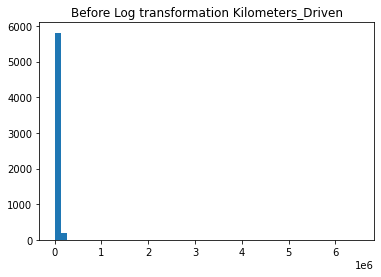

0


<IPython.core.display.Javascript object>

In [1868]:
colname = "Kilometers_Driven"
plt.hist(df["Kilometers_Driven"], bins=50)
plt.title(f"Before Log transformation {colname}")
plt.show()
print(np.sum(df[colname] <= 0))

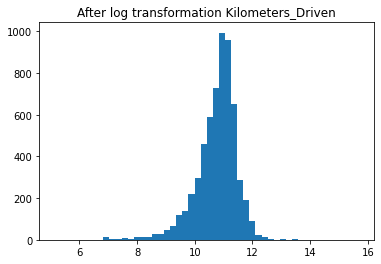

<IPython.core.display.Javascript object>

In [1869]:
plt.hist(np.log(df[colname]), 50)
plt.title(f"After log transformation {colname}")
plt.show()

In [1870]:
df[colname + "_log"] = np.log(df[colname])
# cars.drop(cols_to_log, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [1871]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Kilometers_Driven_log
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26,998.0,58.0,5.0,1.75,Maruti,Wagon R LXI CNG,11.184421
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19,1582.0,126.0,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,10.621327
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18,1199.0,88.0,5.0,4.50,Honda,Jazz V,10.736397
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20,1248.0,88.0,7.0,6.00,Maruti,Ertiga VDI,11.373663
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15,1968.0,140.0,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,10.613246


<IPython.core.display.Javascript object>

# 6 Exploratory Data Analysis (EDA)

## 6.1 Univariate analysis

### 6.1.1 Histogram and BoxPlot

In [1872]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create a boxplot and a histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

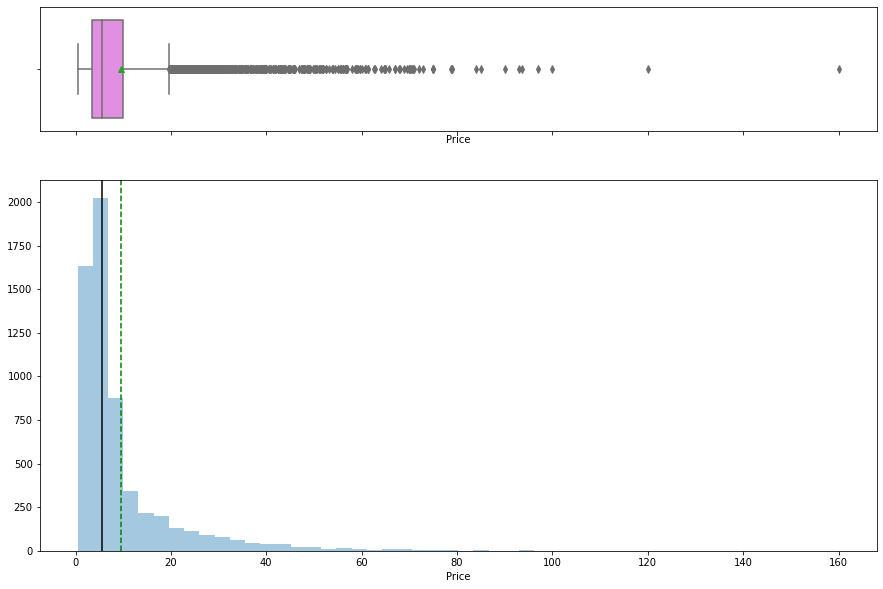

<IPython.core.display.Javascript object>

In [1873]:
# Looking at Price
histogram_boxplot(df["Price"])

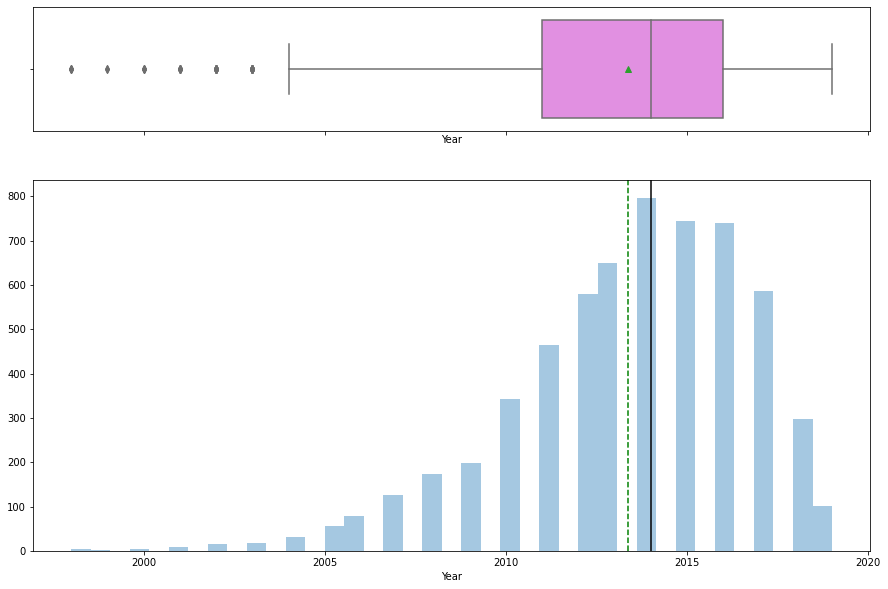

<IPython.core.display.Javascript object>

In [1874]:
histogram_boxplot(df["Year"])

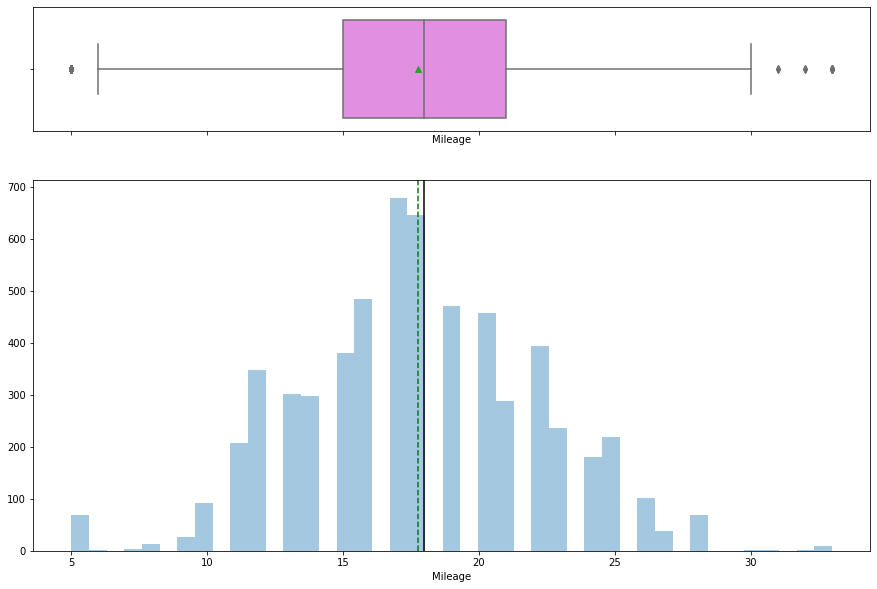

<IPython.core.display.Javascript object>

In [1875]:
histogram_boxplot(df["Mileage"])

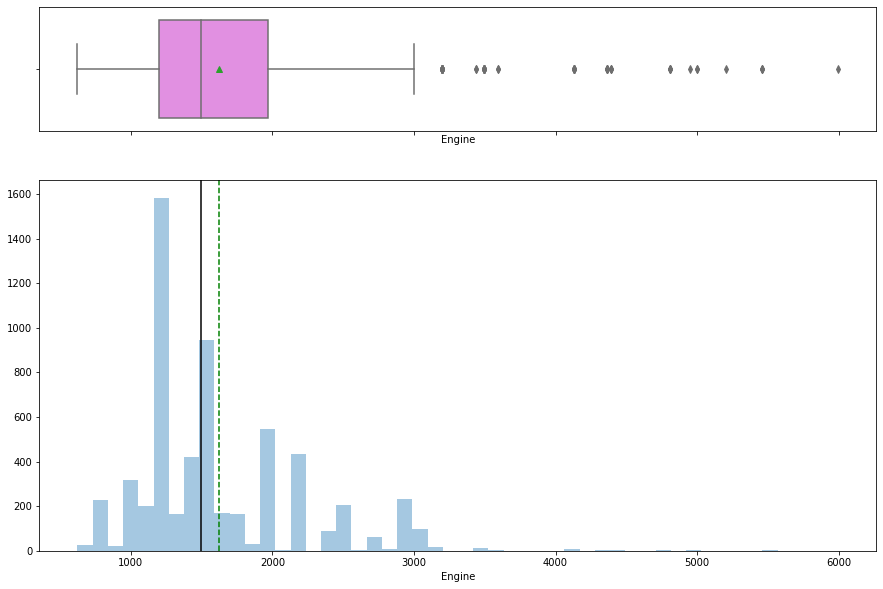

<IPython.core.display.Javascript object>

In [1876]:
histogram_boxplot(df["Engine"])

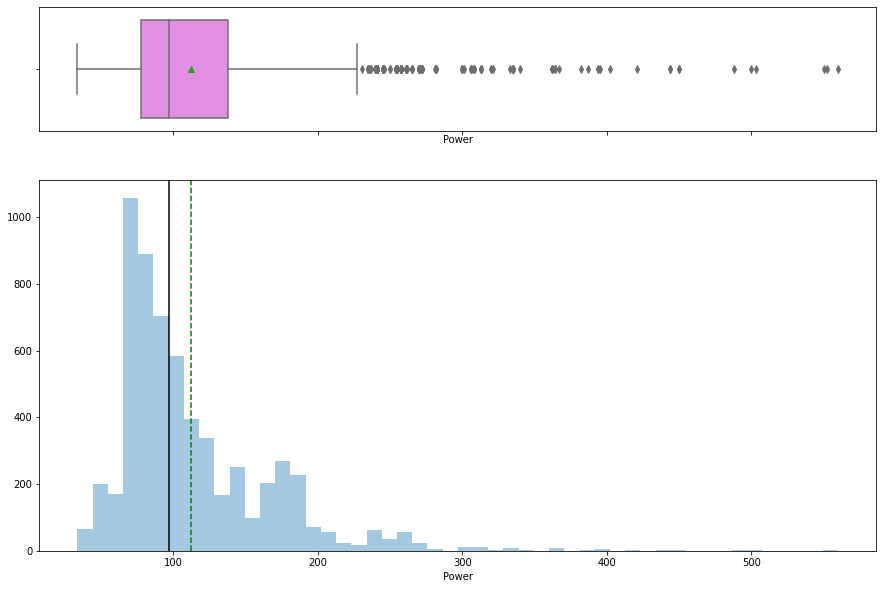

<IPython.core.display.Javascript object>

In [1877]:
histogram_boxplot(df["Power"])

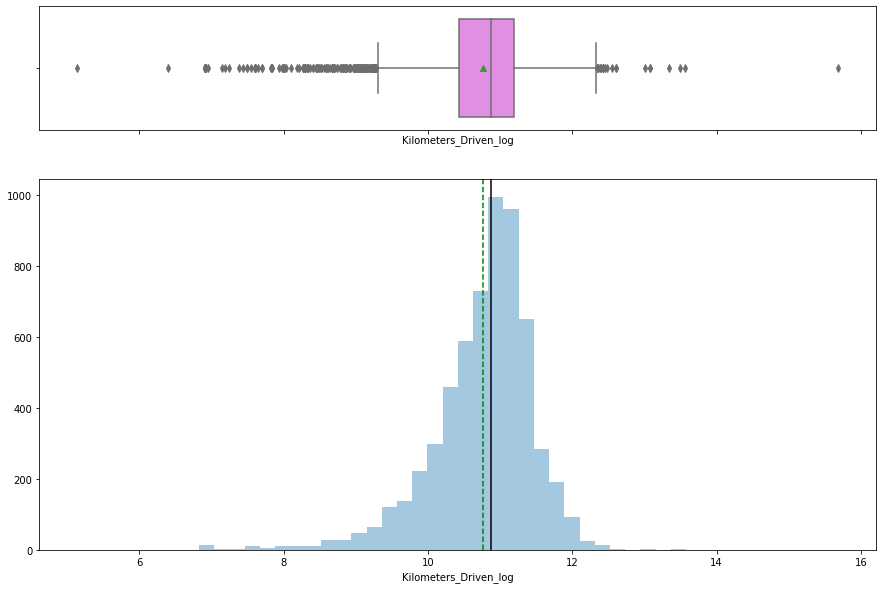

<IPython.core.display.Javascript object>

In [1878]:
histogram_boxplot(df["Kilometers_Driven_log"])

### 6.1.2 Observations on boxplot and histograms
- Price has outliers
- Year - more cars are manufactured in 2014, fewer cars are < 2005
- Most cars have less 10000*10000 KMs driven mileage
- Uniform distribution for mileage
- Power is +vely skewed - also quite a bit of outliers

# 6.1.3 Count plots with Percentages

In [1879]:
# Function to create barplots that indicate percentage for each category.
def percentage_on_barplot(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

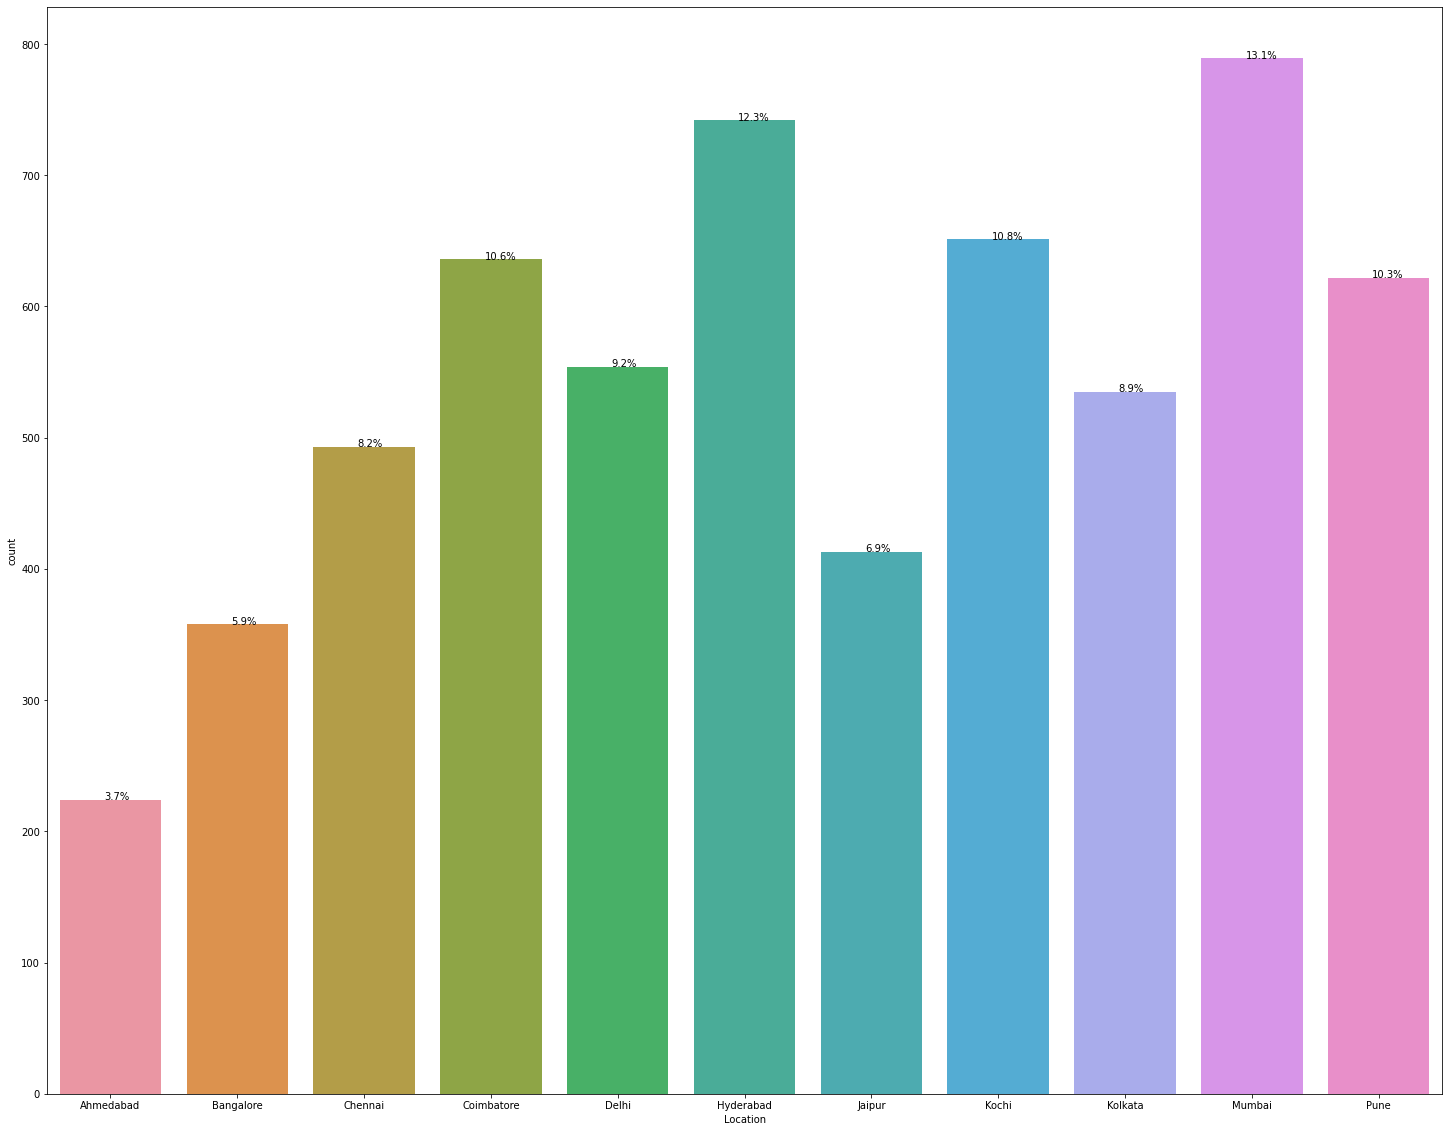

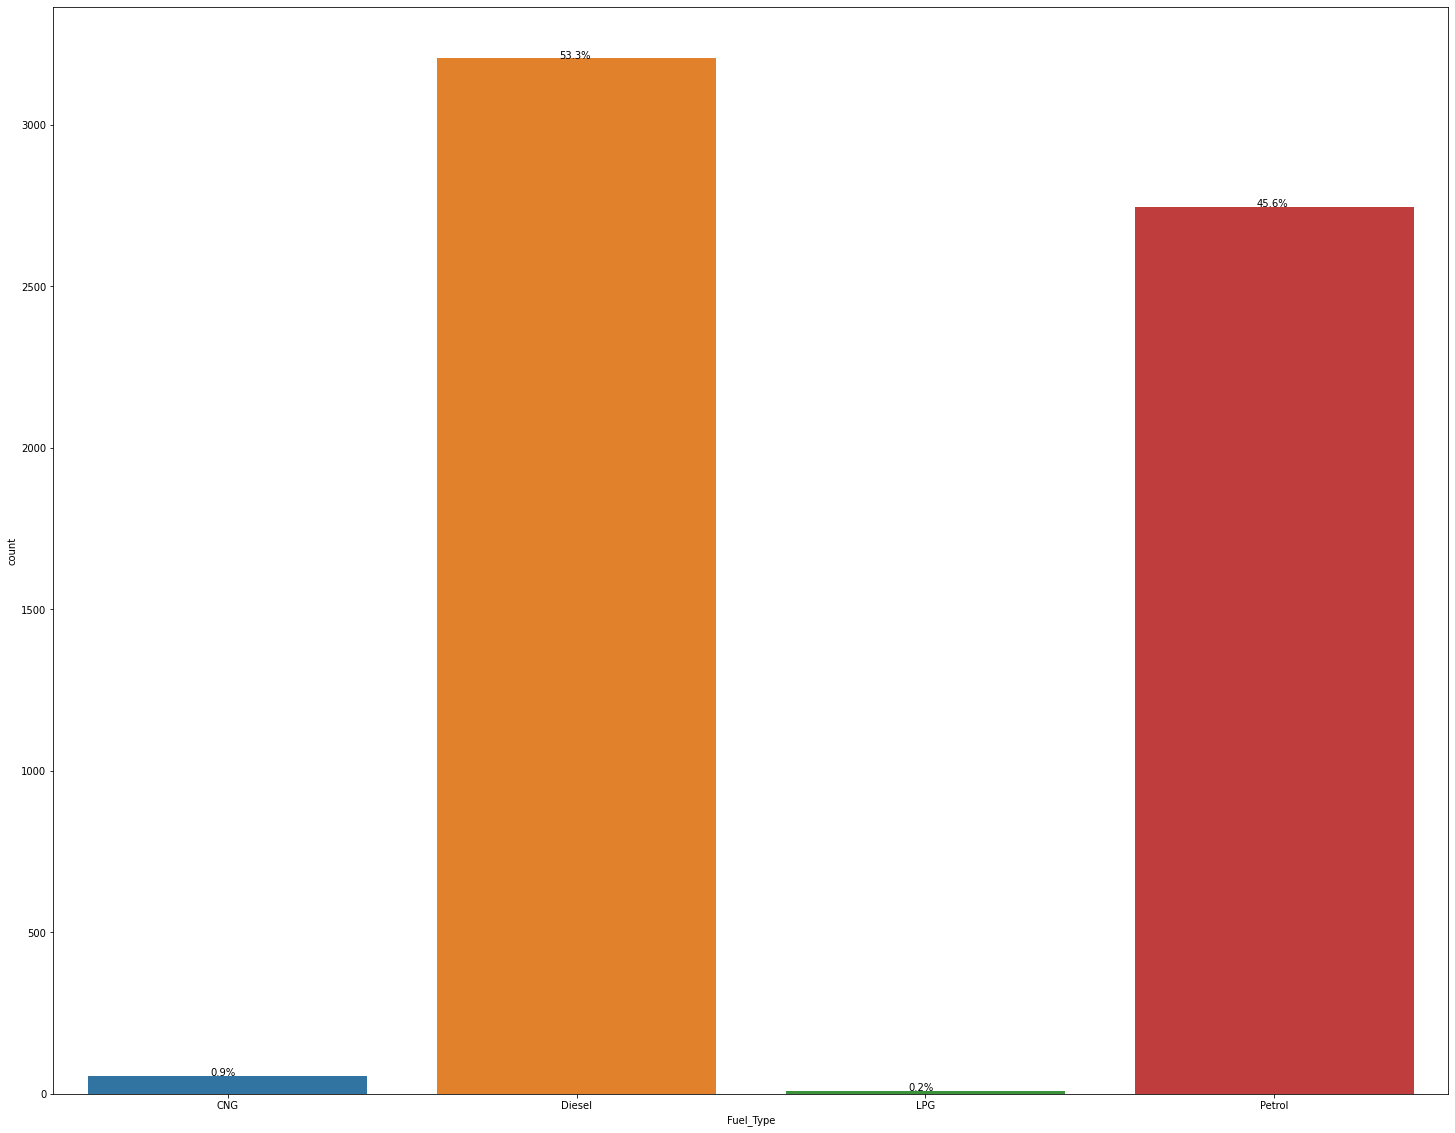

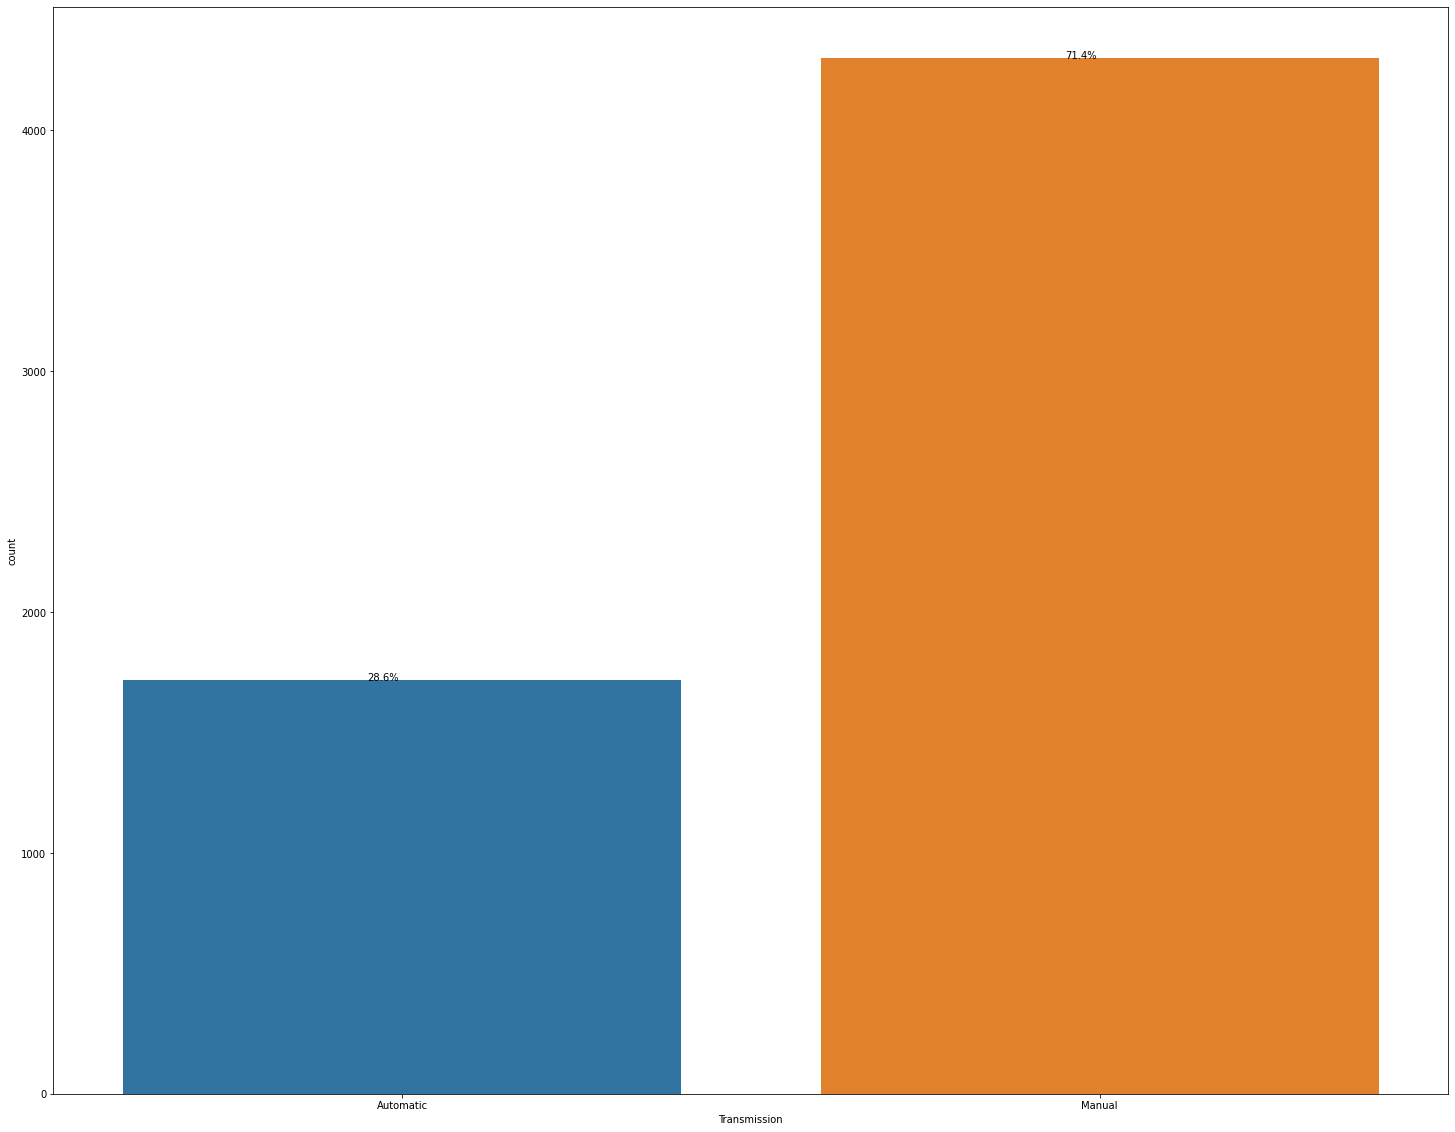

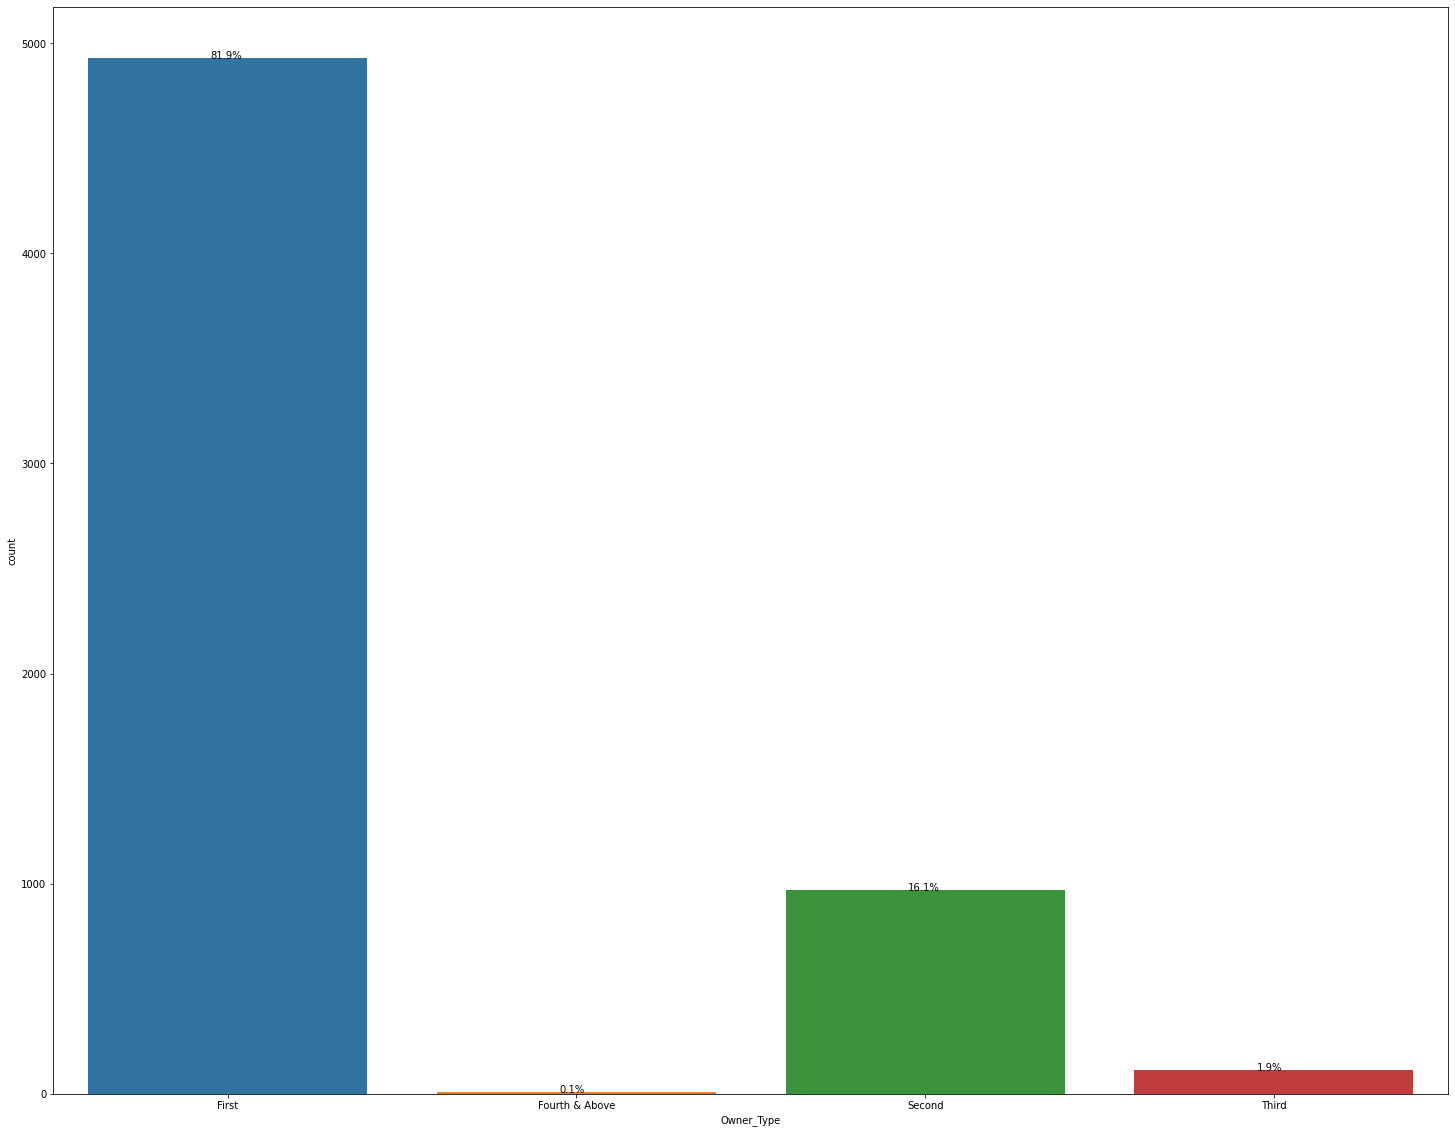

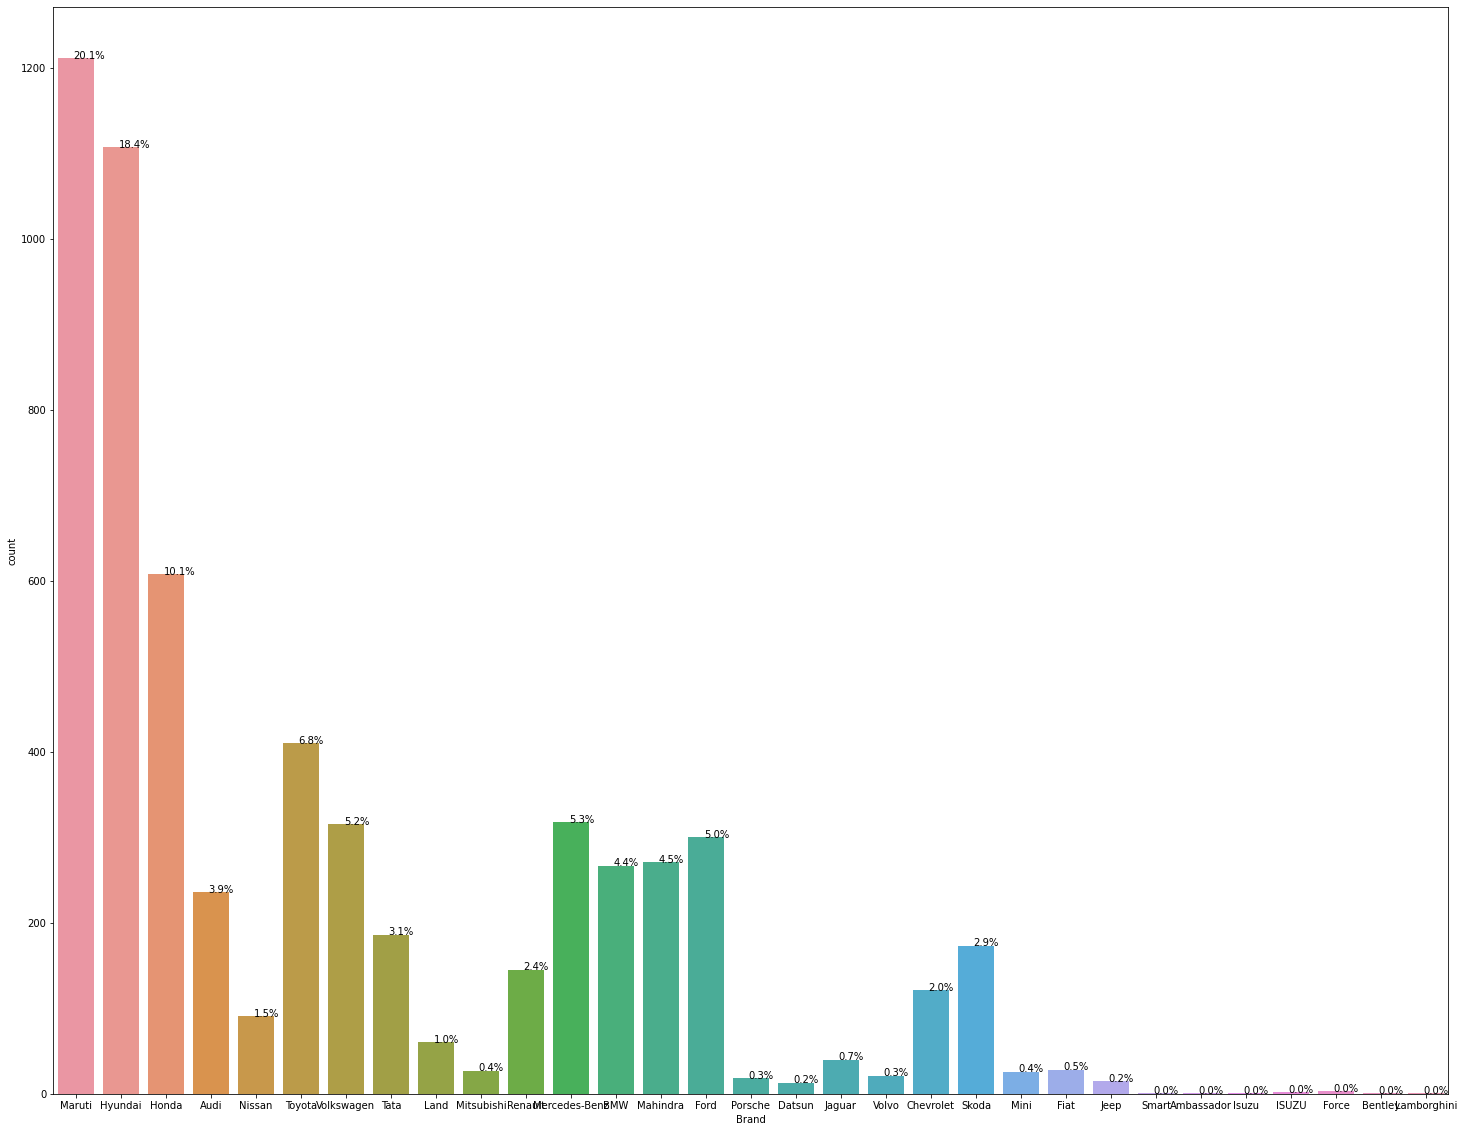

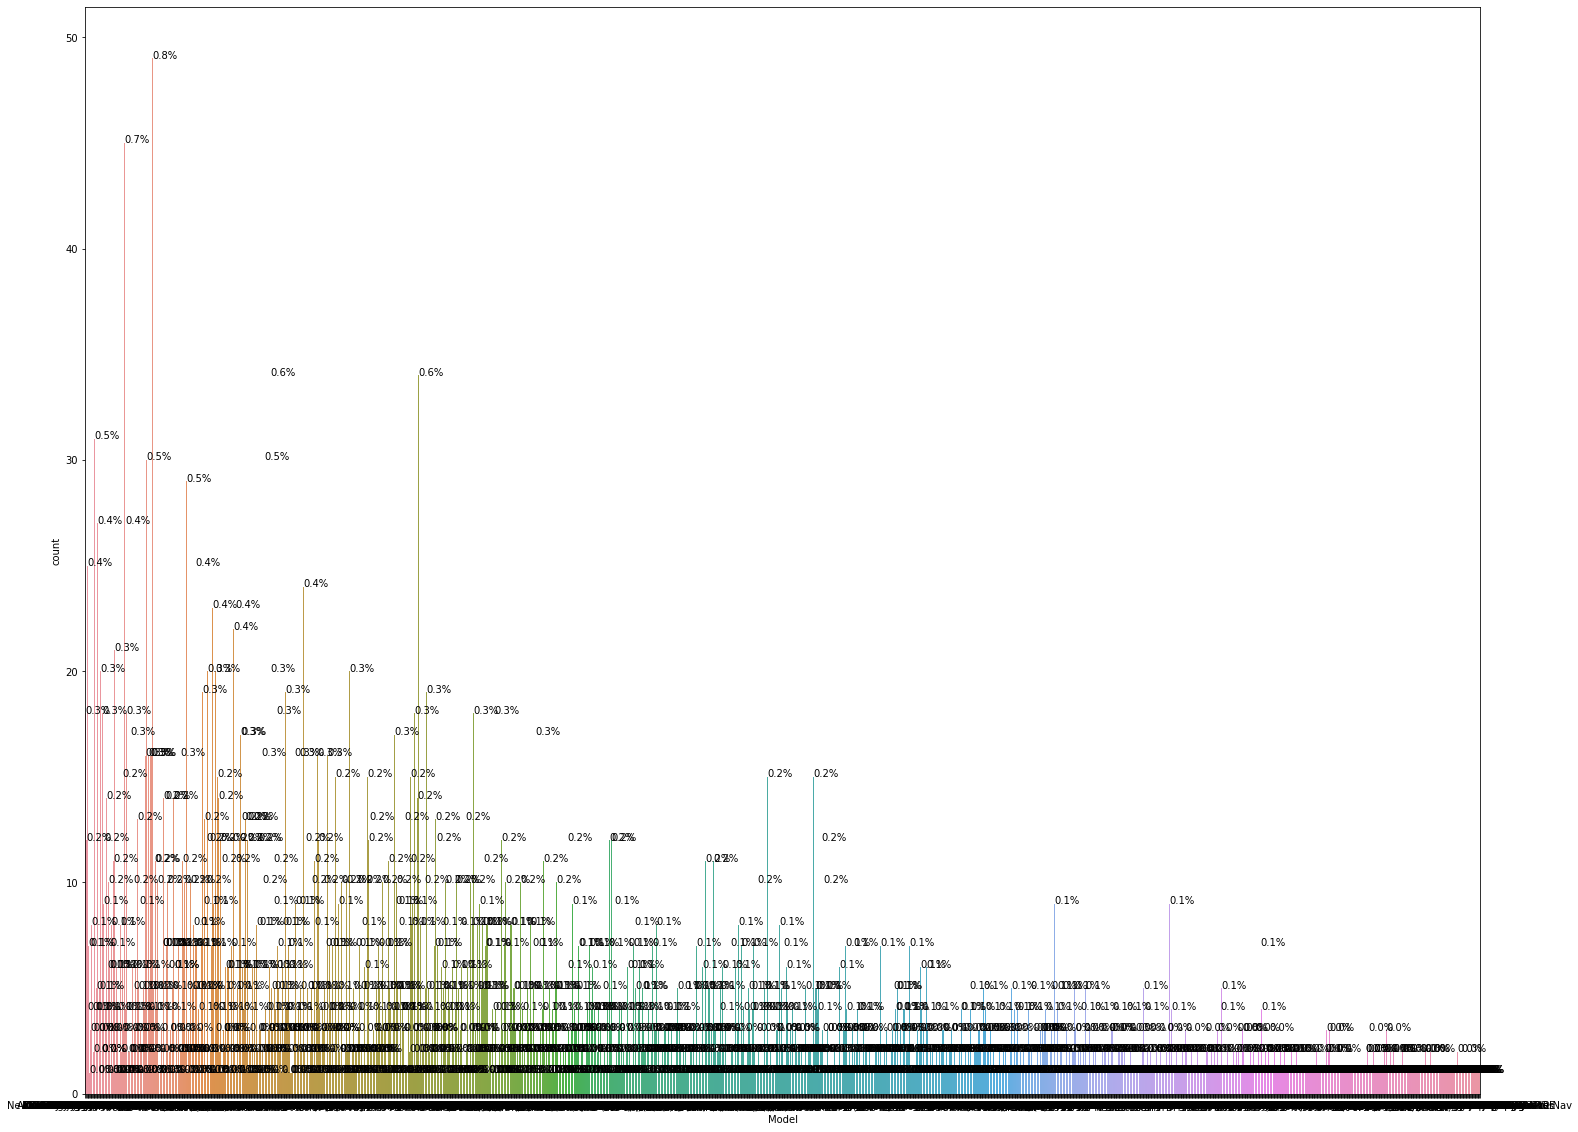

<IPython.core.display.Javascript object>

In [1880]:
for i in list(
    ["Location", "Fuel_Type", "Transmission", "Owner_Type", "Brand", "Model"]
):
    # plt.figure(figsize=[12, 10])
    plt.figure(figsize=[25, 20])
    ax = sns.countplot(df[i])
    percentage_on_barplot(ax, df[i])
    plt.show()

### 6.1.4 Conclusions from count plots
- Mumbai has most cars
- Diesel is most used fuel type
- 70% of car are manual
- Most owners are first time owners
- 83% of cars are 5 seaters
- Maruti, Hyundais, Honda are most popular cars

## 6.2 Bivariate Analysis

<AxesSubplot:>

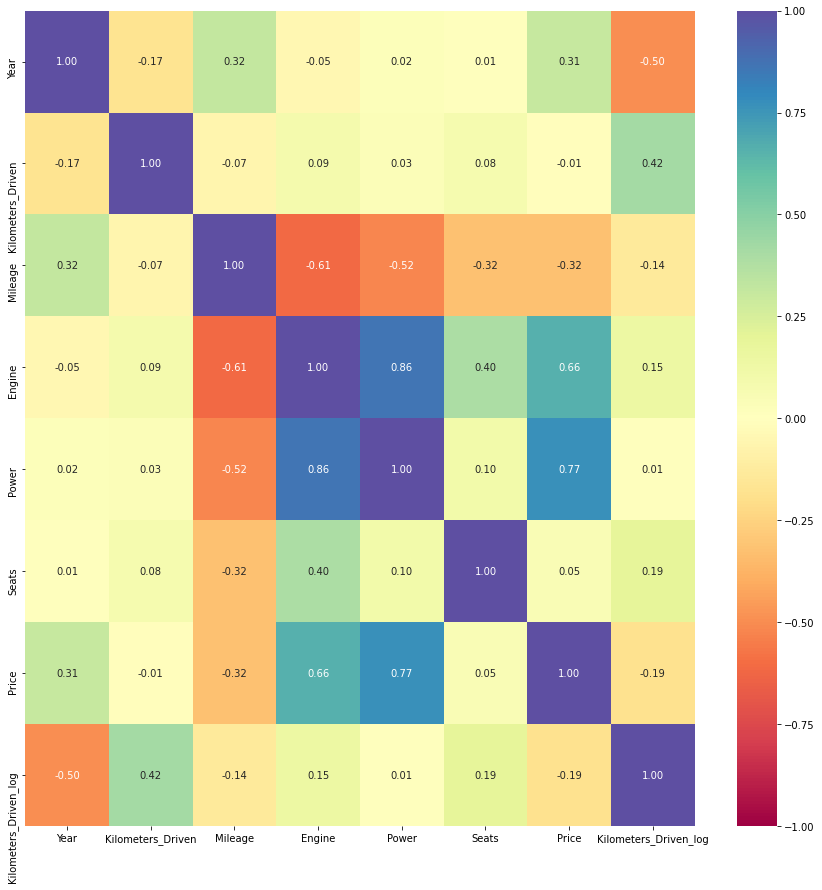

<IPython.core.display.Javascript object>

In [1881]:
plt.figure(figsize=[15, 15])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt="0.2f", cmap="Spectral")

### 6.2.2 Observation from Co-variance plot
- Price shows strong correlation to Power and Engine
- Price is -ve coreation to KM Driven, Mileage

### 6.2.2 Price of cars with other categorical data

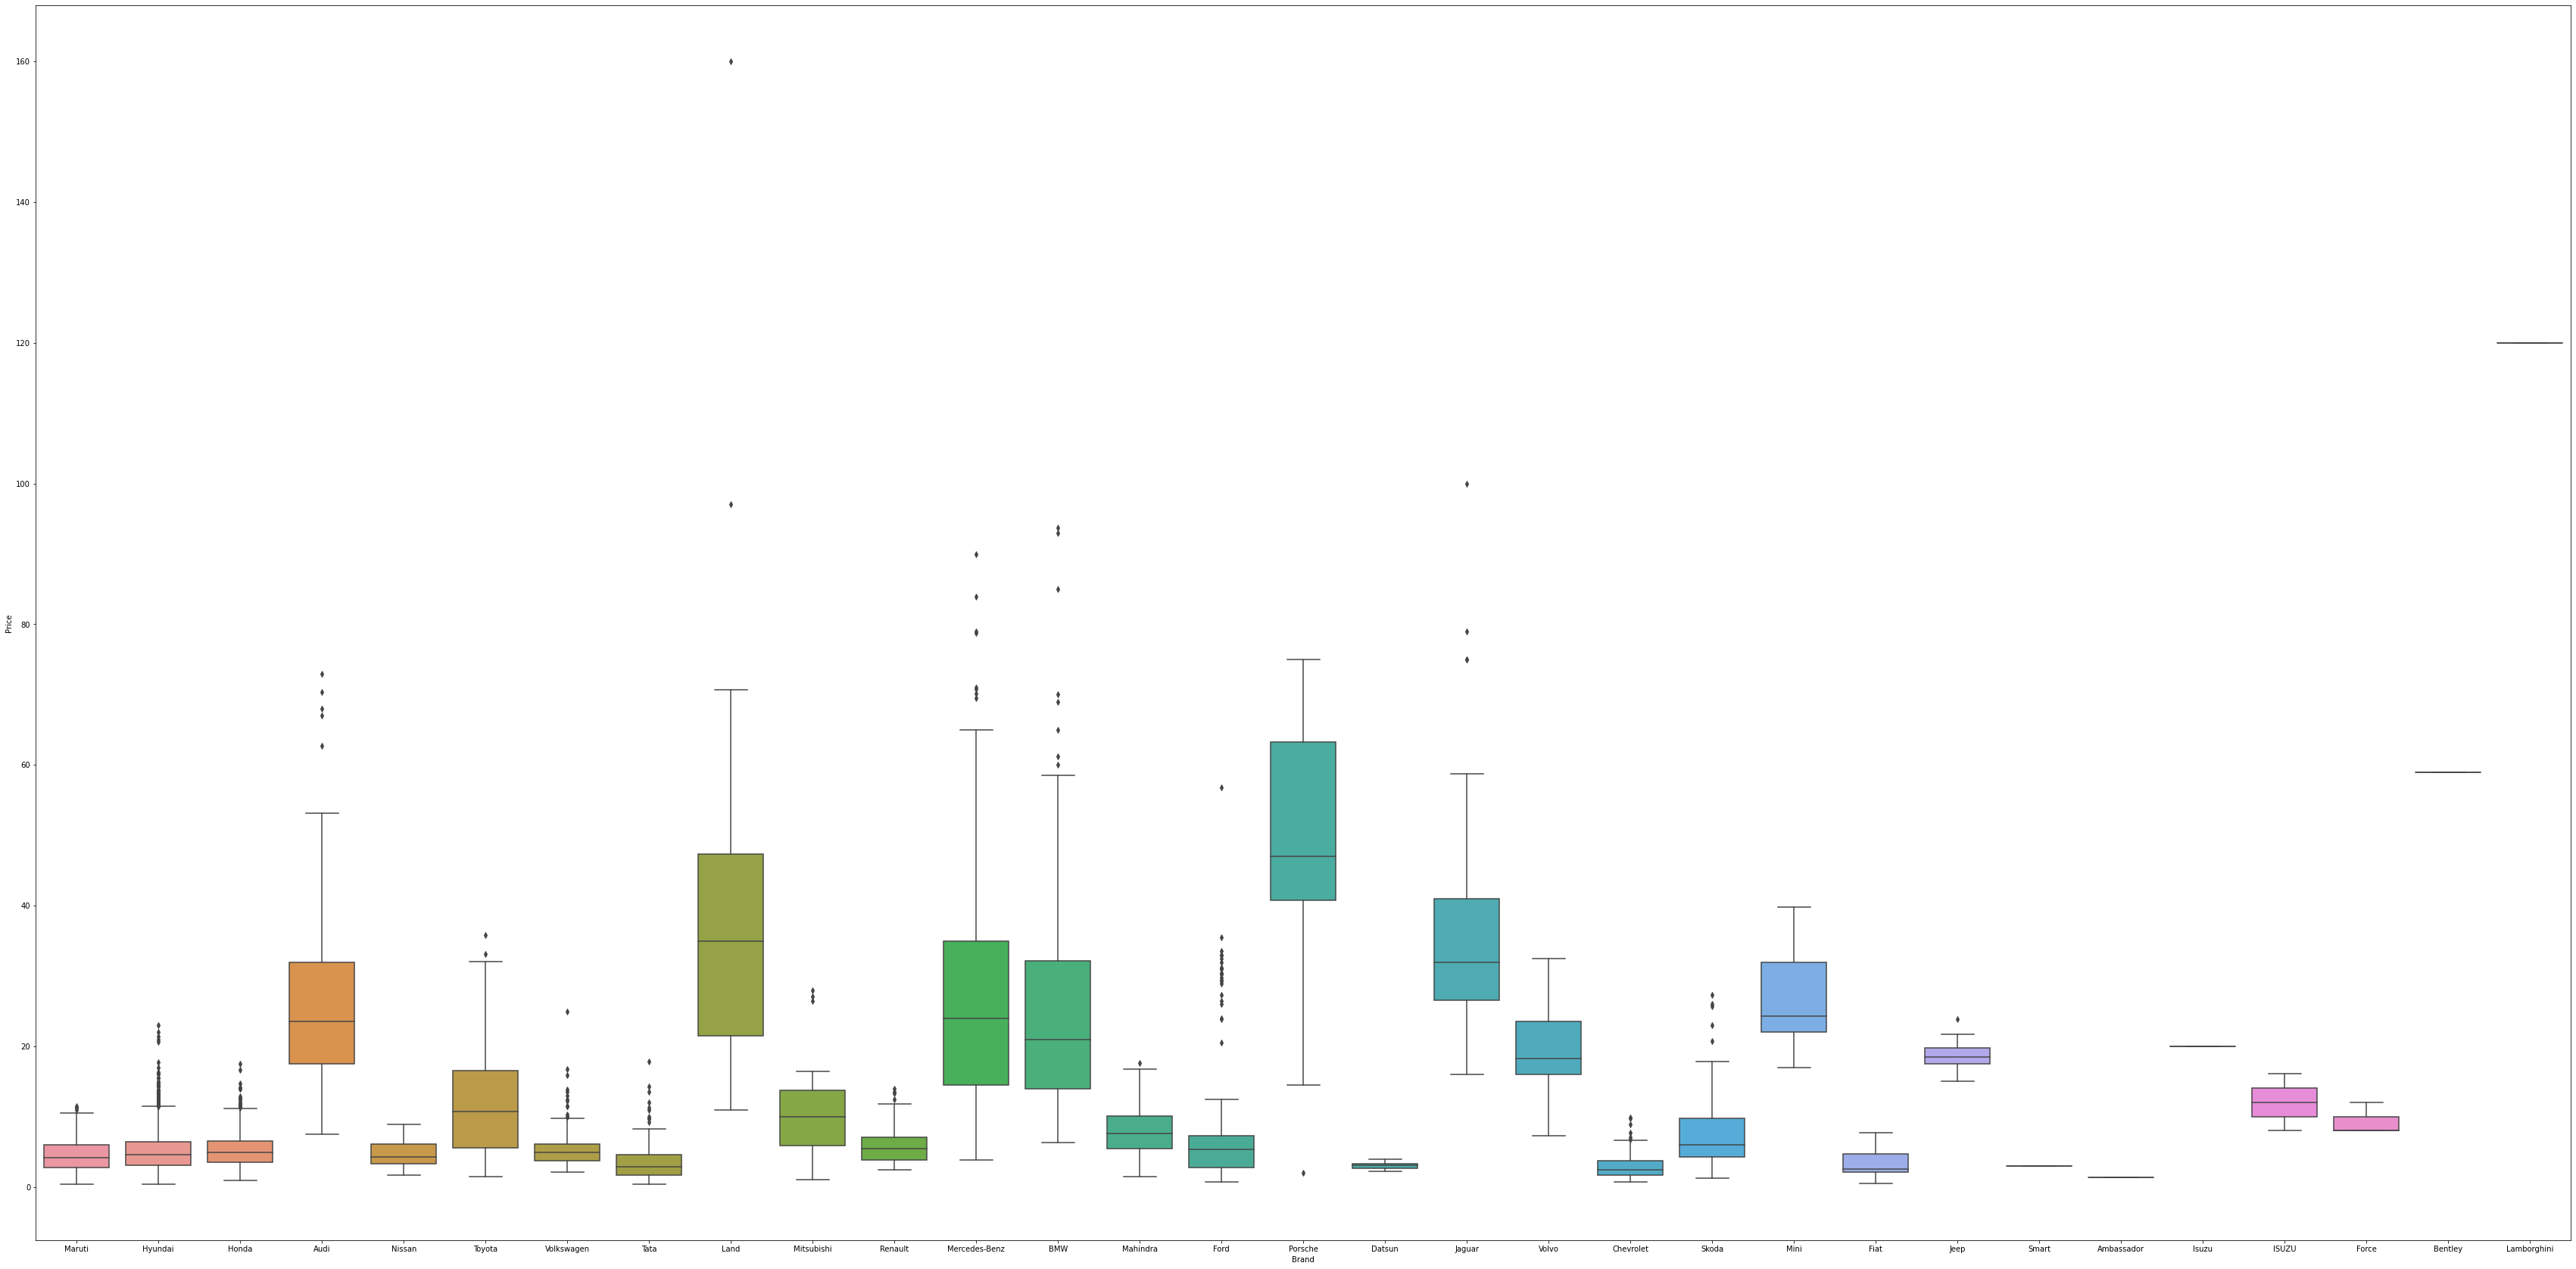

<IPython.core.display.Javascript object>

In [1882]:
# Brand v/s Price
plt.figure(figsize=(60, 30))
sns.boxplot(df["Brand"], df["Price"])
plt.show()

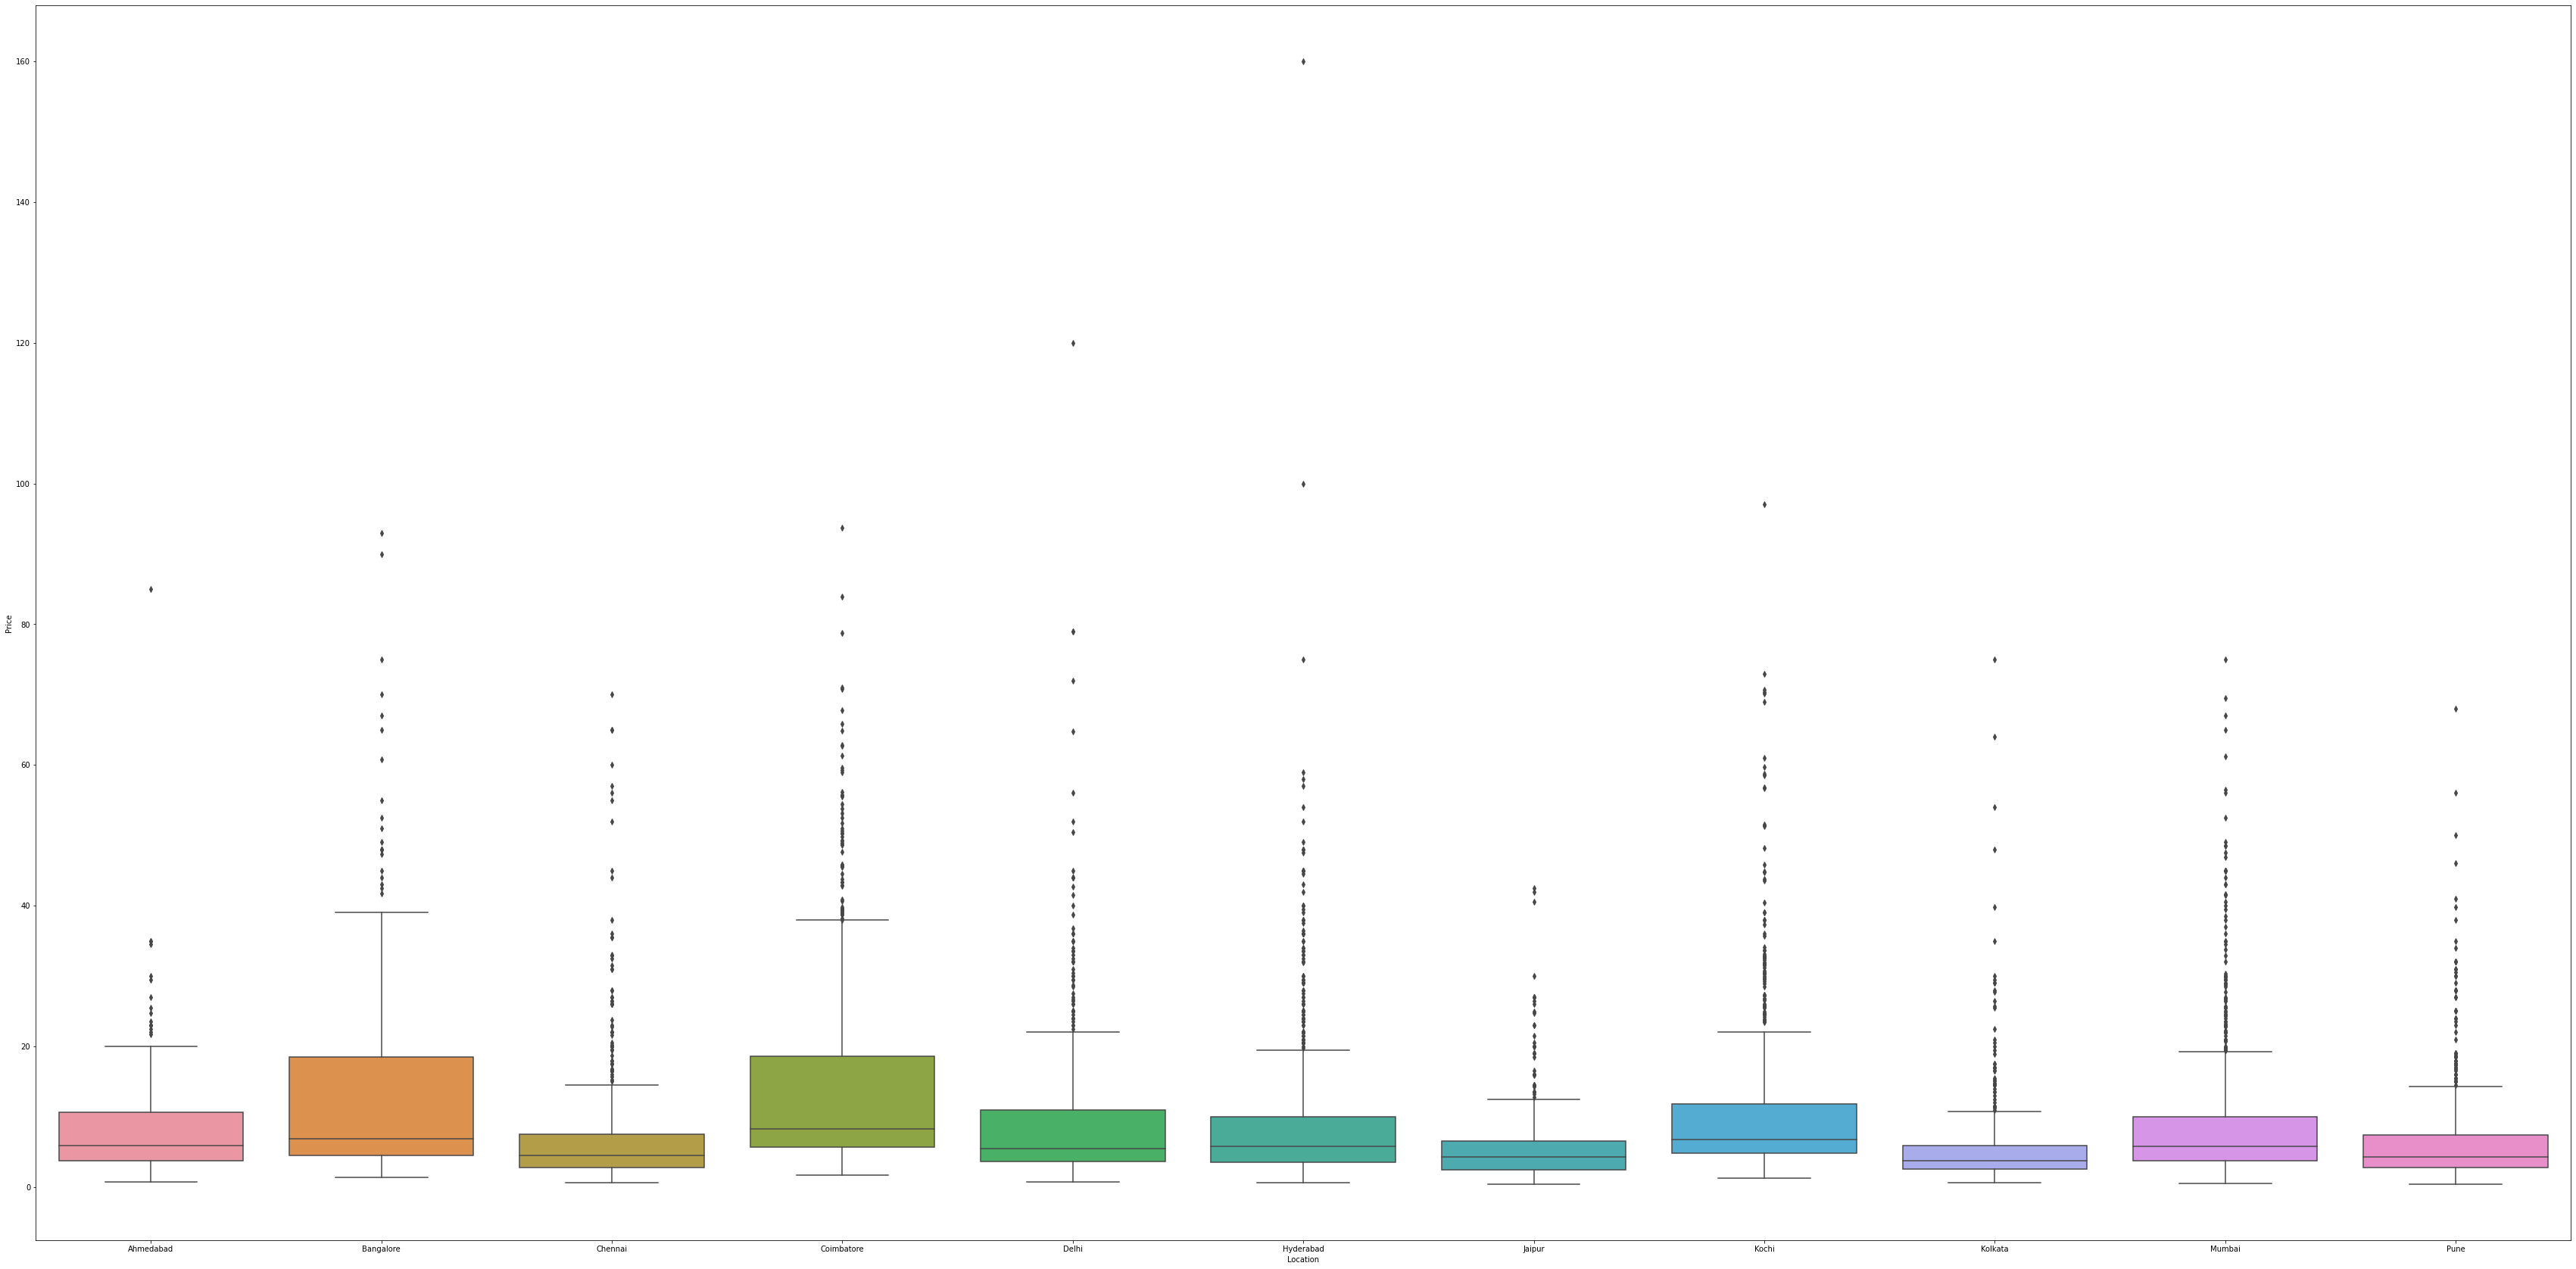

<IPython.core.display.Javascript object>

In [1883]:
# Price v/s Location

plt.figure(figsize=(60, 30))
sns.boxplot(df["Location"], df["Price"])
plt.show()

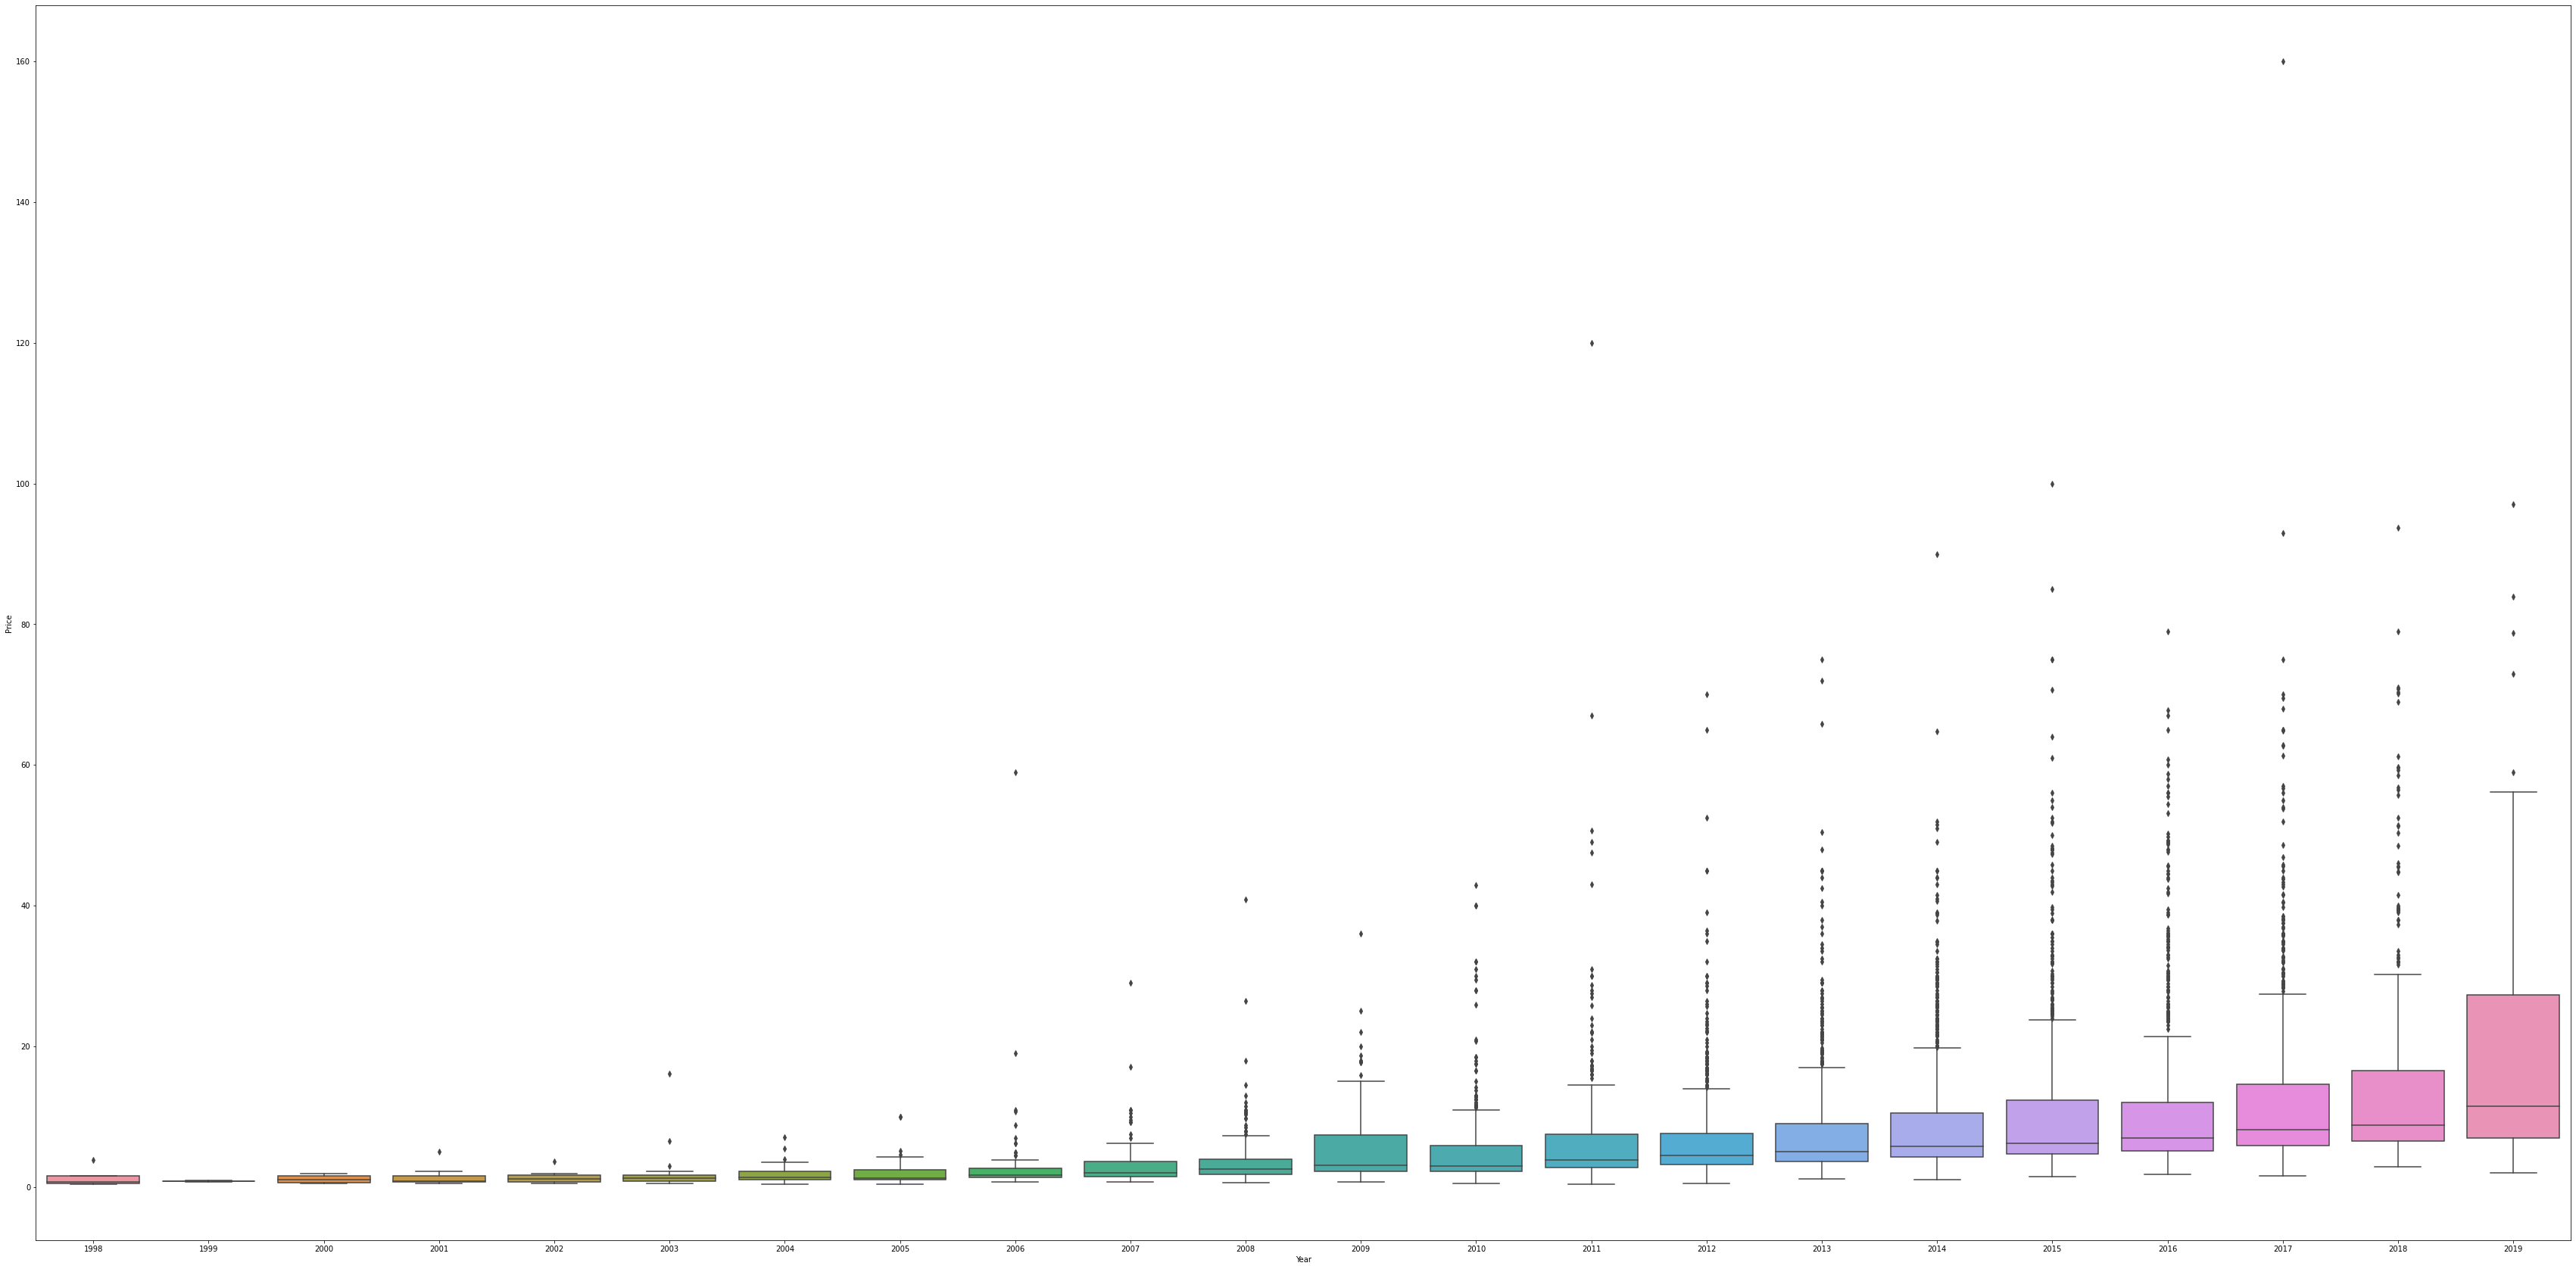

<IPython.core.display.Javascript object>

In [1884]:
# Price v/s Year
plt.figure(figsize=(60, 30))
sns.boxplot(df["Year"], df["Price"])
plt.show()

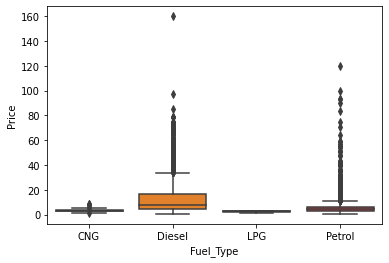

<IPython.core.display.Javascript object>

In [1885]:
# Price v/s Fuel Type
sns.boxplot(df["Fuel_Type"], df["Price"])
plt.show()

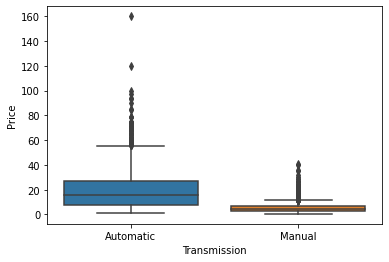

<IPython.core.display.Javascript object>

In [1886]:
# Price v/s Transmission
sns.boxplot(df["Transmission"], df["Price"])
plt.show()

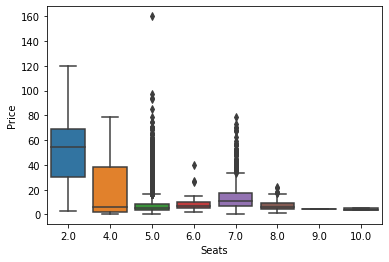

<IPython.core.display.Javascript object>

In [1887]:
# Price v/s Seats
sns.boxplot(df["Seats"], df["Price"])
plt.show()

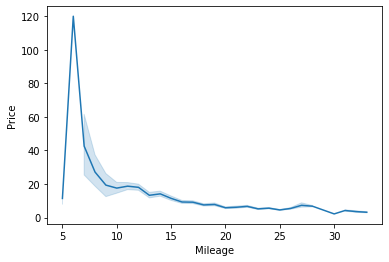

<IPython.core.display.Javascript object>

In [1888]:
# Price v/s Mileage
sns.lineplot(df["Mileage"], df["Price"])
plt.show()

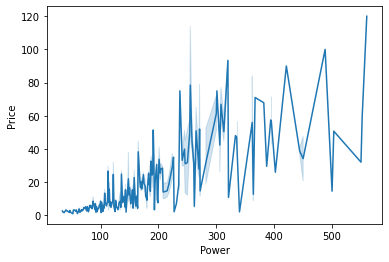

<IPython.core.display.Javascript object>

In [1889]:
# Price v/s Power
sns.lineplot(df["Power"], df["Price"])
plt.show()

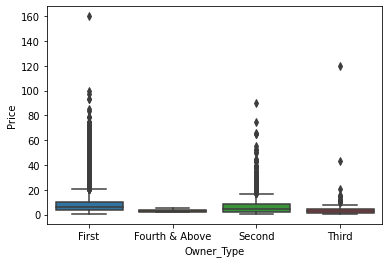

<IPython.core.display.Javascript object>

In [1890]:
# Price v/s Owner_Type
sns.boxplot(df["Owner_Type"], df["Price"])
plt.show()

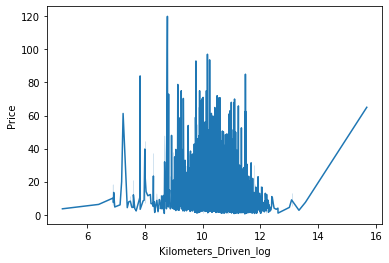

<IPython.core.display.Javascript object>

In [1891]:
# Price v/s KM_Driver
sns.lineplot(df["Kilometers_Driven_log"], df["Price"])
plt.show()

### 6.2.3 Notable observation of prices of cars when compared with other categorical data
- Prices decreases with KM Driven
- higher power car have higher prices
- Automatic cars are more expensive that Manual car

## 6.3 Multivariate Analysis

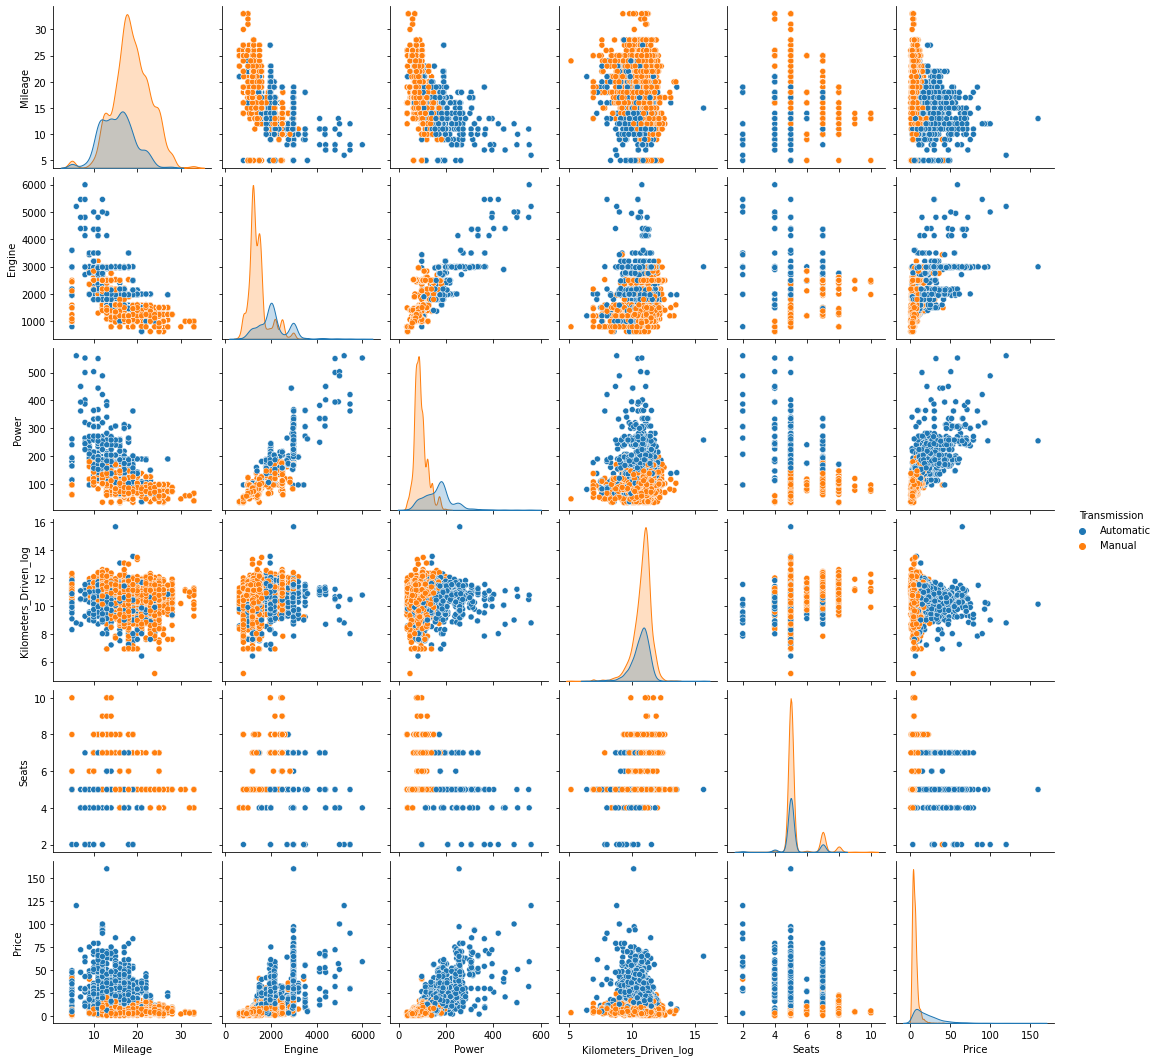

<IPython.core.display.Javascript object>

In [1892]:
sns.pairplot(
    df[
        [
            "Transmission",
            "Mileage",
            "Engine",
            "Fuel_Type",
            "Owner_Type",
            "Power",
            "Kilometers_Driven_log",
            "Seats",
            "Price",
        ]
    ],
    hue="Transmission",
)
plt.show()

<AxesSubplot:xlabel='Mileage', ylabel='Engine'>

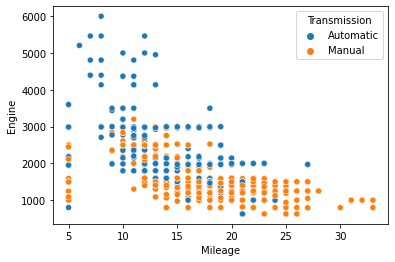

<IPython.core.display.Javascript object>

In [1893]:
# Mileage vs Engine vs Transmission
sns.scatterplot(df["Mileage"], df["Engine"], hue=df["Transmission"])

<AxesSubplot:xlabel='Kilometers_Driven_log', ylabel='Mileage'>

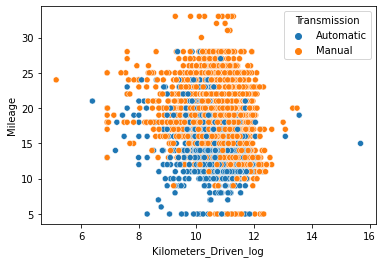

<IPython.core.display.Javascript object>

In [1894]:
# Kilometers_Driven_Log vs Mileage vs Transmission
sns.scatterplot(df["Kilometers_Driven_log"], df["Mileage"], hue=df["Transmission"])

<AxesSubplot:xlabel='Engine', ylabel='Price'>

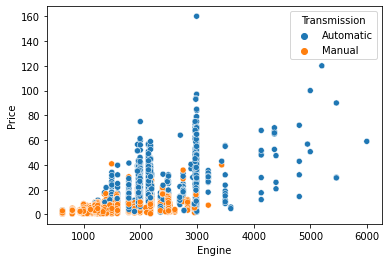

<IPython.core.display.Javascript object>

In [1895]:
# Engine vs Price vs Transmission
sns.scatterplot(df["Engine"], df["Price"], hue=df["Transmission"])

<AxesSubplot:xlabel='Kilometers_Driven_log', ylabel='Price'>

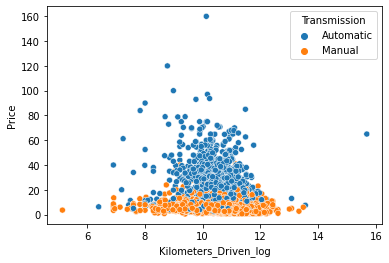

<IPython.core.display.Javascript object>

In [1896]:
# Kilometers Driven vs Price vs Transmission
sns.scatterplot(df["Kilometers_Driven_log"], df["Price"], hue=df["Transmission"])

<AxesSubplot:xlabel='Power', ylabel='Price'>

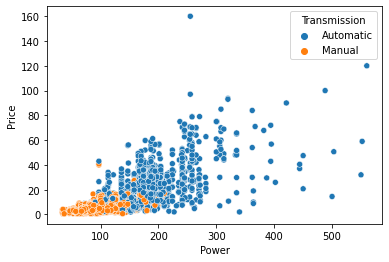

<IPython.core.display.Javascript object>

In [1897]:
# Power vs Price vs Transmission
sns.scatterplot(df["Power"], df["Price"], hue=df["Transmission"])

### 6.3.2 Notable Observations from multivariate analysis
- Automatic cars have higher power and higer engine cc
- Manual cars are cheaper and have higher mileage


## 6.4 Insights based on EDA
- We sell more automatic cars
- Price of cars go up with Power and Engine. 
- Automatic prices are more expensve than manual
- Land Rovers, Porshe have highest prices
- Price decreases with higher mileage and  km driven 

# 7 Feature Engineering

## 7.1 Outlier Determination - visually

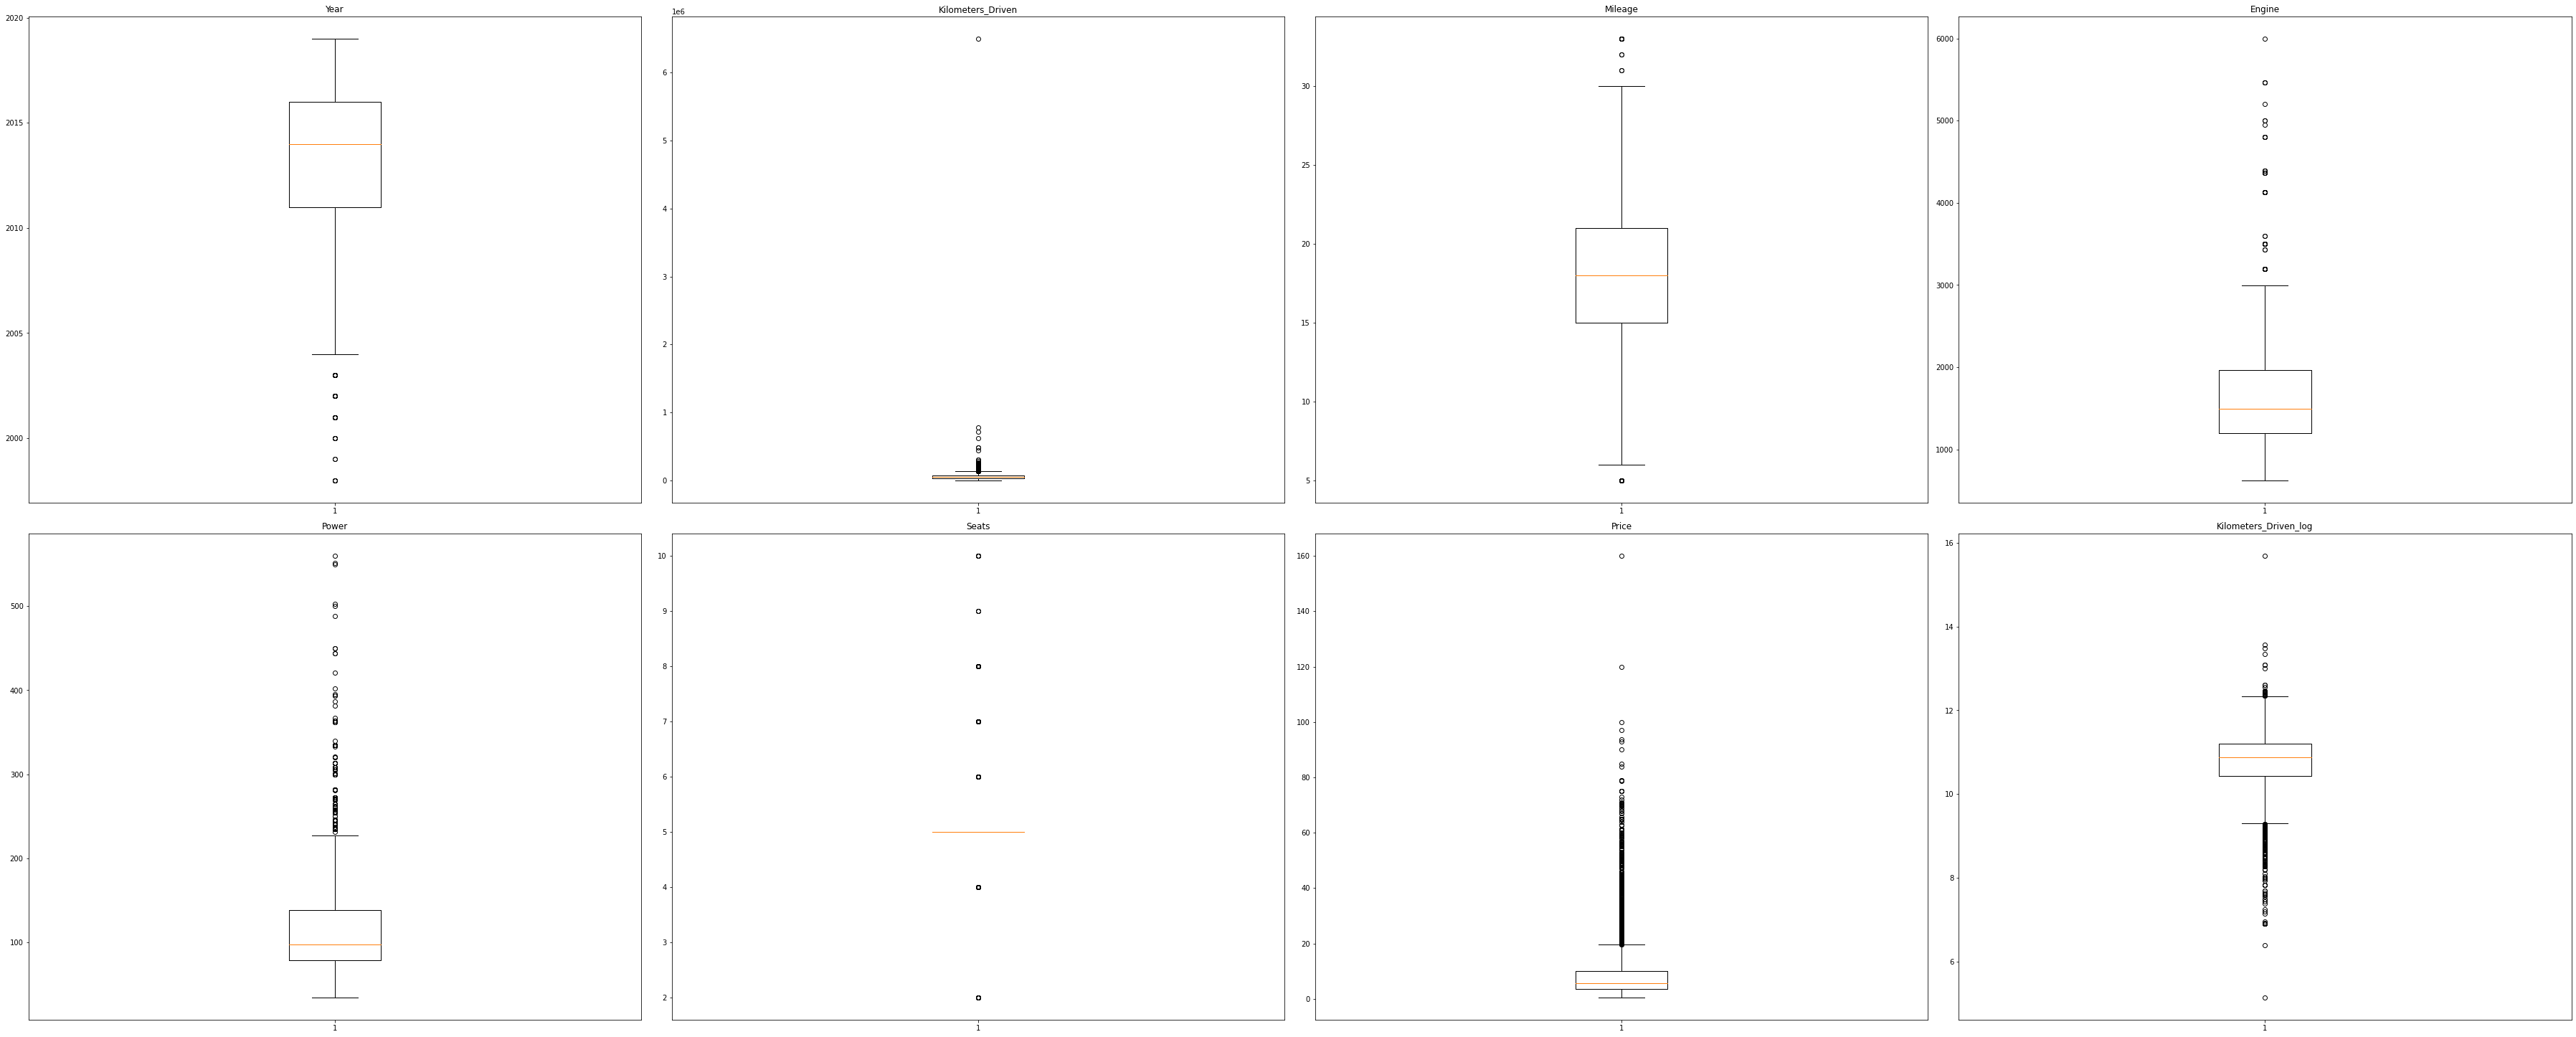

<IPython.core.display.Javascript object>

In [1898]:
# outlier detection using boxplot
numeric_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(50, 50))

for i, y in enumerate(numeric_list):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[y], whis=1.5)
    plt.tight_layout()
    plt.title(y)
plt.show()

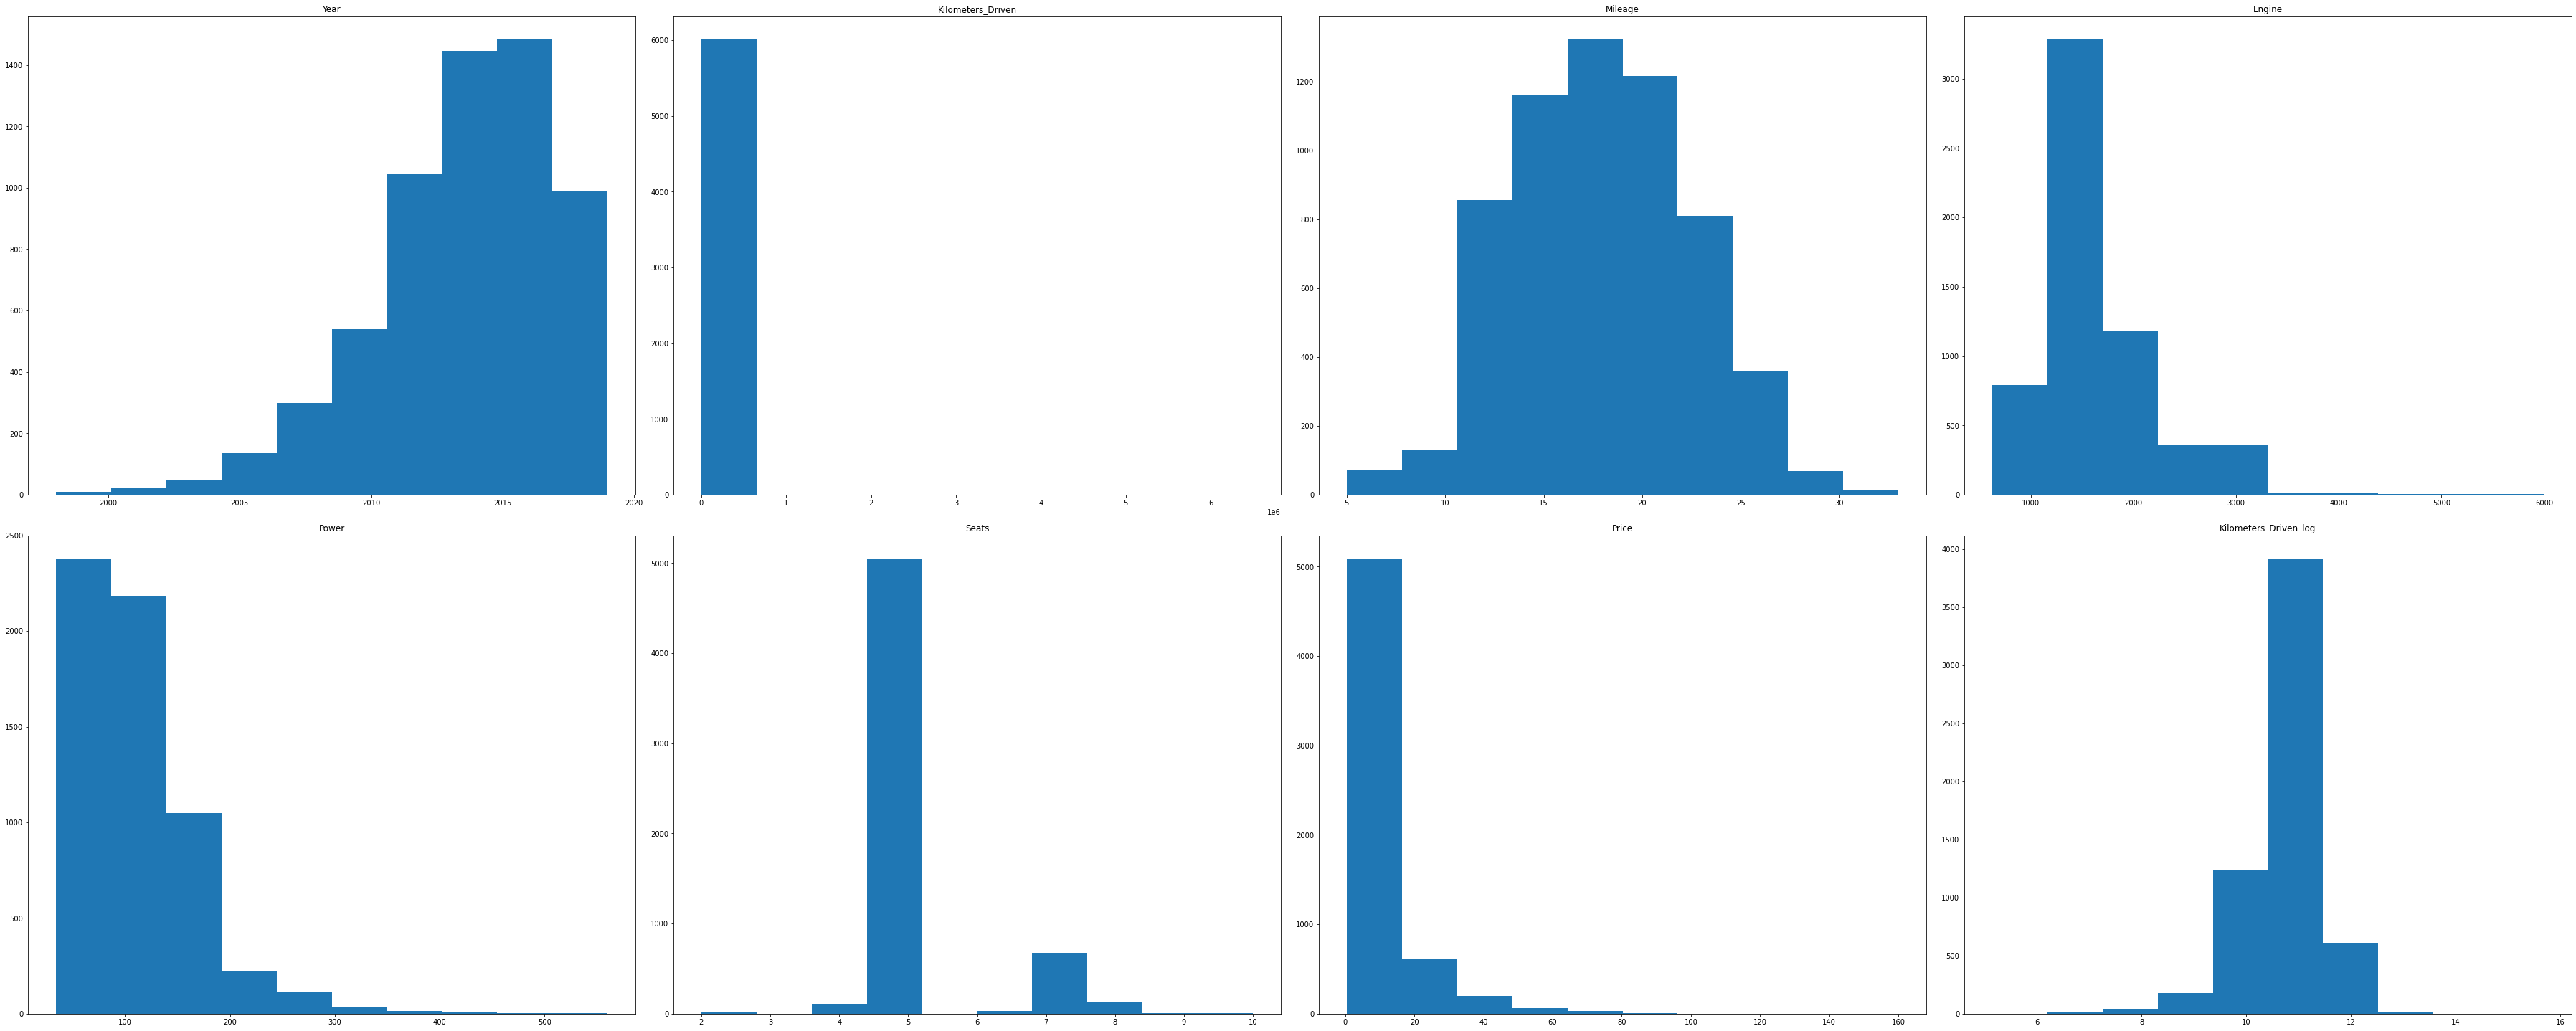

<IPython.core.display.Javascript object>

In [1899]:
# outlier detection using histplot
numeric_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(50, 50))

for i, y in enumerate(numeric_list):
    plt.subplot(5, 4, i + 1)
    # plt.boxplot(df[y], whis=1.5)
    plt.hist(df[y])
    plt.tight_layout()
    plt.title(y)
plt.show()

## 7.2 Observation on outliers
- Engine, Power, Price have ouliers in the higher range

## 7.3 Removing Outliers

In [1900]:
# Helper function find outlier using IQR
# Notes on return values (from notes in course):
#   With the normal data this only flags 5% of the points as suspicious,
#   but with the lognormal data over 13% of the sample is flagged. T
#   This again shows how these statistics depend on the underlying distributions
#   and can't be used without the context.


def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [0.25, 0.75]))
    return np.mean(np.abs(x - np.median(x)) > length)

<IPython.core.display.Javascript object>

In [1901]:
def helper_find_outliers_drop_them(df, list_row_names, drop=False):
    for row in list_row_names:
        print(row)
        quartiles = np.quantile(df[row][df[row].notnull()], [0.25, 0.75])
        power_4iqr = 4 * (quartiles[1] - quartiles[0])
        print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
        outliers = df.loc[np.abs(df[row] - df[row].median()) > power_4iqr, row]
        print(f"Outliers {outliers}")
        if drop:
            print(f"Dropping outliers for {row}")
            df.drop(outliers.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [1902]:
helper_find_outliers_drop_them(df, ["Engine", "Power", "Price"], drop=True)

Engine
Q1 = 1198.0, Q3 = 1969.0, 4*IQR = 3084.0
Outliers S.No.
70      4806.0
152     5461.0
2100    4806.0
2978    4806.0
4451    4951.0
4691    5461.0
4722    5461.0
5088    5000.0
5521    5998.0
5603    4806.0
5781    5204.0
5919    5000.0
Name: Engine, dtype: float64
Dropping outliers for Engine
Power
Q1 = 78.0, Q3 = 138.0, 4*IQR = 240.0
Outliers S.No.
134     362.0
148     444.0
418     367.0
589     364.0
1930    364.0
2095    362.0
3132    340.0
3341    402.0
4061    444.0
4342    364.0
4627    450.0
4821    450.0
5341    382.0
Name: Power, dtype: float64
Dropping outliers for Power
Price
Q1 = 3.5, Q3 = 9.8125, 4*IQR = 25.25
Outliers S.No.
67      35.67
92      39.58
168     45.00
169     33.66
172     42.50
        ...  
5900    43.30
5921    36.00
5927    45.52
5946    48.00
6008    45.00
Name: Price, Length: 316, dtype: float64
Dropping outliers for Price


<IPython.core.display.Javascript object>

# 8 Model Building

# 8.1 Linear Regression Model building


In [1903]:
df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Kilometers_Driven_log
S.No.,,,,,,,,,,,,,,,
3024,Mahindra XUV500 W6 2WD,Hyderabad,2015,113000,Diesel,Manual,First,15,2179.0,140.0,7.0,10.85,Mahindra,XUV500 W6 2WD,11.635143
2650,Hyundai Creta 1.6 CRDi SX,Mumbai,2017,27000,Diesel,Manual,First,19,1582.0,126.0,5.0,12.90,Hyundai,Creta 1.6 CRDi SX,10.203592
3338,Maruti Ritz ZXi,Coimbatore,2016,22767,Petrol,Manual,First,18,1197.0,85.0,5.0,6.14,Maruti,Ritz ZXi,10.033067
4857,Hyundai EON Era Plus,Jaipur,2015,54680,Petrol,Manual,First,21,814.0,55.0,5.0,2.50,Hyundai,EON Era Plus,10.909253
166,Volkswagen Vento 1.5 Highline Plus AT 16 Alloy,Chennai,2013,65000,Diesel,Automatic,First,21,1498.0,108.0,5.0,6.25,Volkswagen,Vento 1.5 Highline Plus AT 16 Alloy,11.082143
2633,Honda City i VTEC SV,Kolkata,2014,48104,Petrol,Manual,First,17,1497.0,117.0,5.0,5.49,Honda,City i VTEC SV,10.781121
2923,Mahindra Thar DI 4X4,Mumbai,2018,2500,Diesel,Manual,First,18,2523.0,63.0,7.0,8.25,Mahindra,Thar DI 4X4,7.824046
1761,Hyundai Grand i10 Magna,Jaipur,2014,42355,Petrol,Manual,First,18,1197.0,82.0,5.0,4.00,Hyundai,Grand i10 Magna,10.653842
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17,1061.0,57.0,5.0,1.45,Maruti,Wagon R LXI DUO BSIII,11.070163


<IPython.core.display.Javascript object>

In [1904]:
X = df.drop(["Price", "Name", "Model"], axis=1)
Y = df[["Price"]]

print(X.head())
print(X.shape)
print("================================================================")
print(Y.head())
print(Y.shape)


         Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
S.No.                                                                          
0          Mumbai  2010              72000       CNG       Manual      First   
1            Pune  2015              41000    Diesel       Manual      First   
2         Chennai  2011              46000    Petrol       Manual      First   
3         Chennai  2012              87000    Diesel       Manual      First   
4      Coimbatore  2013              40670    Diesel    Automatic     Second   

       Mileage  Engine  Power  Seats    Brand  Kilometers_Driven_log  
S.No.                                                                 
0           26   998.0   58.0    5.0   Maruti              11.184421  
1           19  1582.0  126.0    5.0  Hyundai              10.621327  
2           18  1199.0   88.0    5.0    Honda              10.736397  
3           20  1248.0   88.0    7.0   Maruti              11.373663  
4           1

<IPython.core.display.Javascript object>

# 8.2 Dummy variables creation


In [1905]:
X = pd.get_dummies(
    X,
    columns=["Location", "Fuel_Type", "Transmission", "Owner_Type", "Seats", "Brand"],
    drop_first=True,
)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010,72000,26,998.0,58.0,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19,1582.0,126.0,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18,1199.0,88.0,10.736397,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20,1248.0,88.0,11.373663,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15,1968.0,140.0,10.613246,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [1906]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [1907]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4099,2018,10000,18,1197.0,81.0,9.210340,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
218,2017,10500,14,1598.0,103.0,9.259131,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1534,2019,23882,17,1497.0,117.0,10.080880,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1216,2010,76752,17,1497.0,117.0,11.248335,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5789,2019,7858,25,799.0,53.0,8.969287,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [1908]:
Y_train.head()

,Price
S.No.,
4099,6.50
218,8.90
1534,11.87
1216,3.57
5789,3.80


<IPython.core.display.Javascript object>

In [1909]:
X_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1210,2017,16100,17,1591.0,121.0,9.686575,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1004,2013,21983,18,1995.0,184.0,9.998025,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1899,2015,42000,17,1197.0,80.0,10.645425,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3086,2014,74041,18,1248.0,73.0,11.212374,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5261,2015,37929,24,998.0,67.0,10.543471,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [1910]:
Y_test.head()

,Price
S.No.,
1210,11.60
1004,16.50
1899,5.10
3086,3.88
5261,3.69


<IPython.core.display.Javascript object>

## 8.3 Linear Regression Model - train and eval

In [1911]:
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(X_train, Y_train)

print("Intercept of the linear equation:", linearregression.intercept_)
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)

Intercept of the linear equation: [-1216.908359]

COefficients of the equation are: [[ 6.14067908e-01 -7.53362523e-06 -1.25133438e-01  3.82767776e-04
   4.45416162e-02 -3.33309153e-01  1.12561116e+00  3.53795473e-01
   1.13783768e+00 -6.44064922e-01  6.95756108e-01  2.97465604e-01
  -9.95186934e-02 -1.24293541e+00 -5.19860145e-01  3.69405786e-02
   1.11738957e+00 -3.78369330e-01 -6.69621946e-01 -1.05799339e+00
  -7.60611167e-01 -5.14670750e-01 -3.95505330e-01 -6.96526345e+00
  -7.99896585e+00 -7.40071259e+00 -6.56563562e+00 -7.55468071e+00
  -8.21034616e+00 -7.60135307e+00  4.60092304e+00  2.88628897e+00
  -4.66322347e+00 -6.02908720e+00 -4.99251592e+00 -3.85390466e+00
  -3.58765676e+00 -3.65798025e+00 -3.58539055e+00 -4.61755236e+00
  -1.22639676e-11  6.84496054e+00  2.02244147e+00  7.35493961e+00
  -5.08058672e+00 -3.26252912e+00  3.83911816e+00  9.37394466e+00
  -1.84979118e+00 -3.83238193e+00 -4.12921229e+00 -3.08647466e+00
   5.95079541e-13 -5.36848510e+00 -1.06814898e+00 -4.08572

<IPython.core.display.Javascript object>

## 8.4 Model Performance

In [1912]:
# Mean Absolute Error on test
mean_absolute_error(Y_test, pred)

1.7106400973026807

<IPython.core.display.Javascript object>

In [1913]:
# RMSE on test data
mean_squared_error(Y_test, pred) ** 0.5

2.6205608185886726

<IPython.core.display.Javascript object>

In [1914]:
# R Squared: on test
r2_score(Y_test, pred)

0.8318082189418434

<IPython.core.display.Javascript object>

In [1915]:
# Training Score
linearregression.score(X_train, Y_train)

0.8414583022995538

<IPython.core.display.Javascript object>

## 8.4 Observations from Model
- The Training and testing scores are ~83% and both scores are comparable
- R2_score is 83%, that explains 79% of total variation in the dataset.  
- Training score is 84%, confirming Linear Regression is a good model 

# 9 Actionable insights and recommendations
- The model predicts with 84% accuracy
- Year of vehicle is main contributor to calculate price
- The second contribute to pricing is the KM Driven

# References
1. https://github.com/sandhyanair83/Cars4u/blob/main/Cars4U%20Project.ipynb
2. https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe
3. https://github.com/sandeepseshadri/Cars4U/blob/main/Cars4U.ipynb